In [ ]:
# pip install scikit-learn pandas seaborn biopython

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('../../data/proteingym/cv_folds_multiples_substitutions/RASK_HUMAN_Weng_2022_binding-DARPin_K55.csv')
df.head()

mutant                                   mutated_sequence  DMS_score  \
0       A11C  MTEYKLVVVGCGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...  -0.018170   
1  A11C:D38C  MTEYKLVVVGCGGVGKSALTIQLIQNHFVDEYDPTIECSYRKQVVI...  -0.572733   
2  A11C:E37G  MTEYKLVVVGCGGVGKSALTIQLIQNHFVDEYDPTIGDSYRKQVVI...  -1.135869   
3  A11C:E63V  MTEYKLVVVGCGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...  -0.541015   
4  A11C:L19P  MTEYKLVVVGCGGVGKSAPTIQLIQNHFVDEYDPTIEDSYRKQVVI...  -1.243287   

   DMS_score_bin  mutation_depth  fold_rand_multiples  
0              1               1                    4  
1              0               2                    1  
2              0               2                    2  
3              0               2                    0  
4              0               2                    2

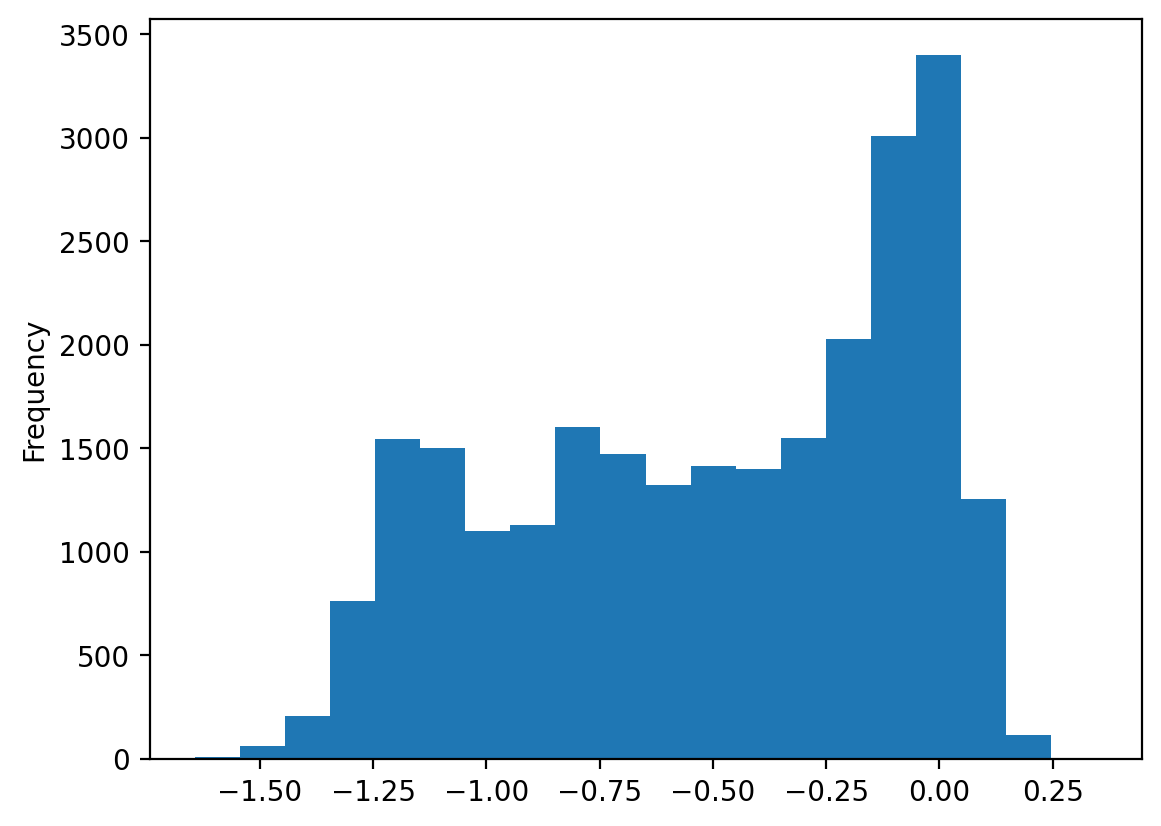

In [3]:
df['DMS_score'].plot.hist(bins=20);

In [4]:
from matplotlib import patches as mpatches
from matplotlib import pyplot as plt

aa_colors = { # Taylor coloring
    'A': (204, 255, 0),
    'V': (153, 255, 0),
    'I': (102, 255, 0),
    'L': (51, 255, 0),
    'M': (0, 255, 0),
    'F': (0, 255, 102),
    'Y': (0, 255, 204),
    'W': (0, 204, 255),
    'H': (51, 102, 255),
    'R': (112, 125, 255),
    'K': (163, 133, 255),
    'N': (204, 0, 255),
    'Q': (255, 0, 204),
    'E': (255, 0, 102),
    'D': (255, 0, 0),
    'S': (255, 51, 0),
    'T': (255, 102, 0),
    'G': (255, 153, 0),
    'P': (255, 204, 0),
    'C': (255, 255, 0),
    '-': (255, 255, 255),
}
def plot_msa(msa, figsize=(15, 10), step=None, extra_colors={}, extra_labels={}):
    if step is None:
        step = max(1, len(msa.columns) // 30)
    fig, ax = plt.subplots(figsize=figsize)
    cmap = {**aa_colors, **extra_colors}
    ax.imshow([[cmap[aa] for aa in row][:] for i, row in msa.iterrows()], 
              interpolation='nearest', 
              aspect='auto');
    ax.set_xticks(list(range(0, len(msa.columns), step)))
    ax.set_xticklabels(msa.columns.tolist()[::step], rotation=90);
    legend = {**aa_colors, **extra_labels}
    ax.legend(
        handles=[mpatches.Patch(color=tuple(v/255 for v in color), label=label) for label, color in legend.items()],
        loc='lower center',
        bbox_to_anchor=(0.5, 1.0),
        ncols=len(legend),
        frameon=False,
        handlelength=0.7
    )
    return ax

In [5]:
msa = df['mutated_sequence'].apply(lambda seq: pd.Series(list(seq), index=range(1, len(seq)+1)))
msa.head()

1   2   3   4   5   6   7   8   9   10   ... 179 180 181 182 183 184 185  \
0   M   T   E   Y   K   L   V   V   V   G  ...   K   K   S   K   T   K   C   
1   M   T   E   Y   K   L   V   V   V   G  ...   K   K   S   K   T   K   C   
2   M   T   E   Y   K   L   V   V   V   G  ...   K   K   S   K   T   K   C   
3   M   T   E   Y   K   L   V   V   V   G  ...   K   K   S   K   T   K   C   
4   M   T   E   Y   K   L   V   V   V   G  ...   K   K   S   K   T   K   C   

  186 187 188  
0   V   I   M  
1   V   I   M  
2   V   I   M  
3   V   I   M  
4   V   I   M  

[5 rows x 188 columns]

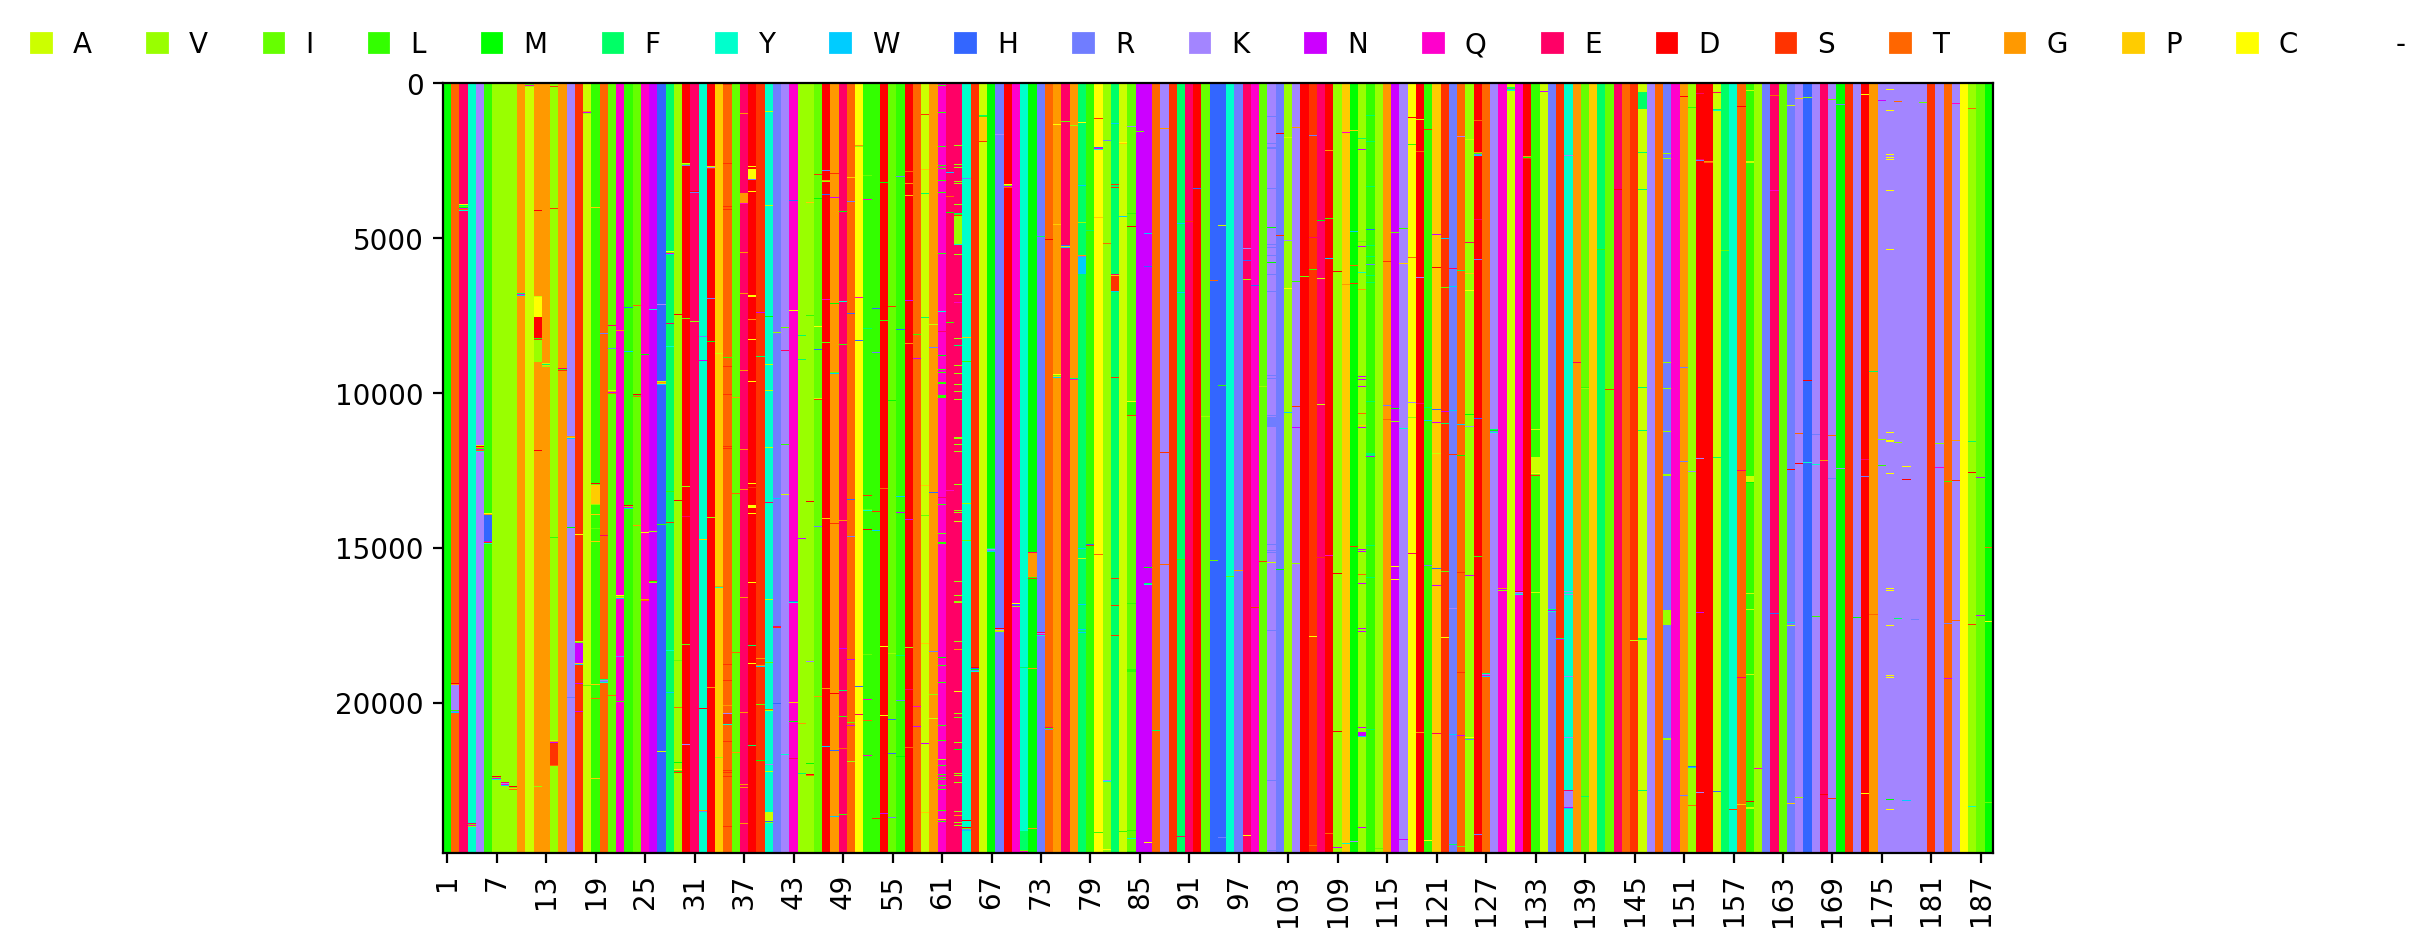

In [6]:
plot_msa(msa, figsize=(10, 5));

<Axes: >

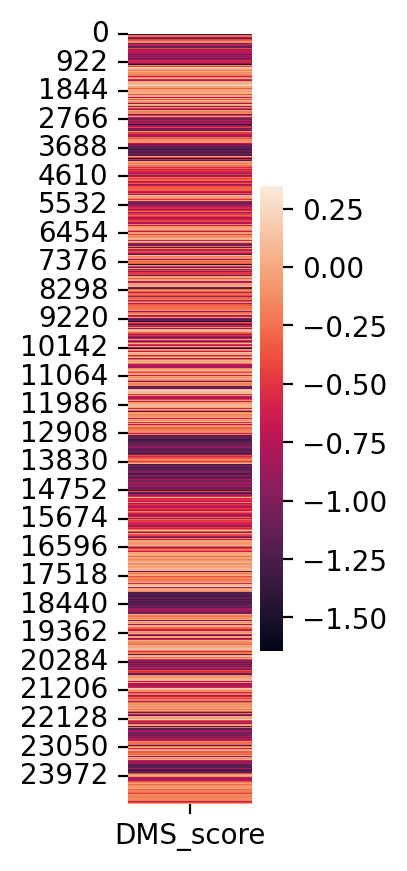

In [7]:
fig, ax = plt.subplots(figsize=(1, 5))
sns.heatmap(df[['DMS_score']])

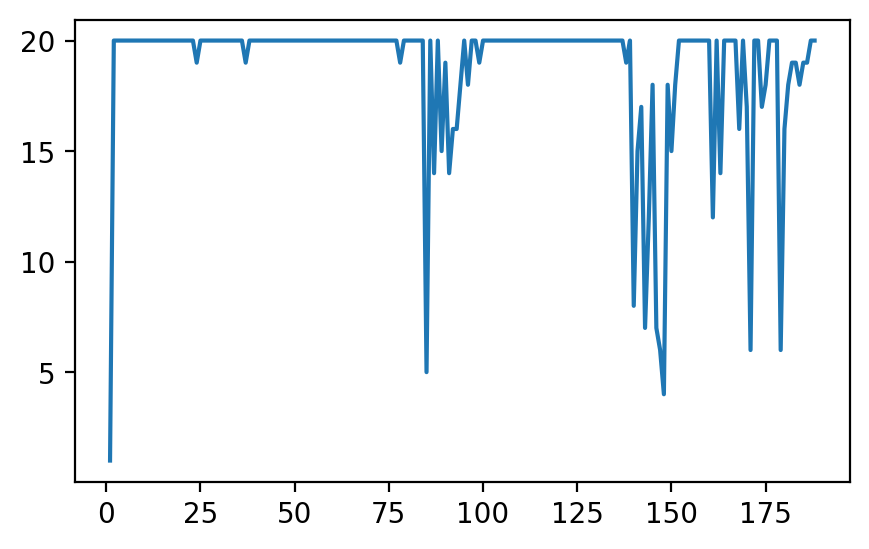

In [8]:
msa.nunique().plot(figsize=(5, 3));

In [114]:
X = pd.get_dummies(msa)
X.head()

1_M    2_A    2_C    2_D    2_E    2_F    2_G    2_H    2_I    2_K  ...  \
0  True  False  False  False  False  False  False  False  False  False  ...   
1  True  False  False  False  False  False  False  False  False  False  ...   
2  True  False  False  False  False  False  False  False  False  False  ...   
3  True  False  False  False  False  False  False  False  False  False  ...   
4  True  False  False  False  False  False  False  False  False  False  ...   

   188_M  188_N  188_P  188_Q  188_R  188_S  188_T  188_V  188_W  188_Y  
0   True  False  False  False  False  False  False  False  False  False  
1   True  False  False  False  False  False  False  False  False  False  
2   True  False  False  False  False  False  False  False  False  False  
3   True  False  False  False  False  False  False  False  False  False  
4   True  False  False  False  False  False  False  False  False  False  

[5 rows x 3530 columns]

In [10]:
y = df['DMS_score']
y.head()

0   -0.018170
1   -0.572733
2   -1.135869
3   -0.541015
4   -1.243287
Name: DMS_score, dtype: float64

<Axes: >

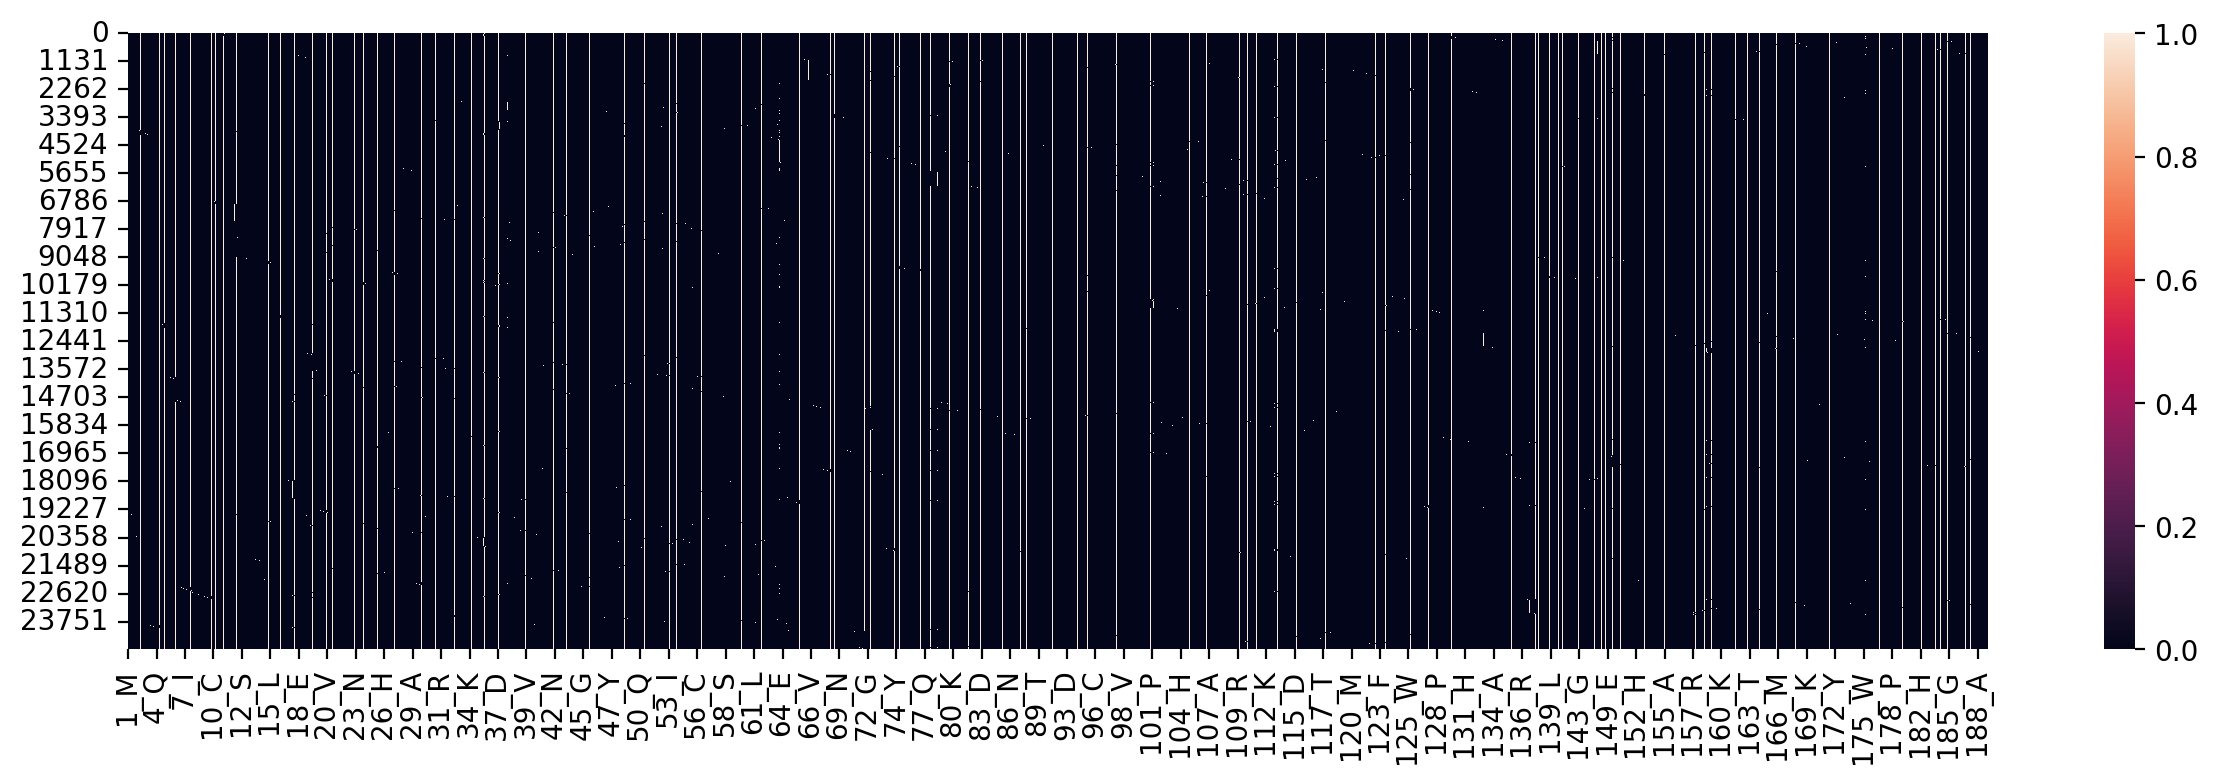

In [30]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.heatmap(X)

# t-SNE

In [11]:
from sklearn.manifold import TSNE

In [12]:
tsne = TSNE(perplexity=50).fit_transform(X)
tsne = pd.DataFrame(tsne, columns=['t-SNE 1', 't-SNE 2'], index=X.index)

tsne = tsne.join(df)

tsne.head()

t-SNE 1    t-SNE 2     mutant  \
0 -36.926476   6.048909       A11C   
1  56.714256 -76.666084  A11C:D38C   
2  66.932724 -48.984436  A11C:E37G   
3   9.216086 -71.192703  A11C:E63V   
4  19.394493  -2.465320  A11C:L19P   

                                    mutated_sequence  DMS_score  \
0  MTEYKLVVVGCGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...  -0.018170   
1  MTEYKLVVVGCGGVGKSALTIQLIQNHFVDEYDPTIECSYRKQVVI...  -0.572733   
2  MTEYKLVVVGCGGVGKSALTIQLIQNHFVDEYDPTIGDSYRKQVVI...  -1.135869   
3  MTEYKLVVVGCGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...  -0.541015   
4  MTEYKLVVVGCGGVGKSAPTIQLIQNHFVDEYDPTIEDSYRKQVVI...  -1.243287   

   DMS_score_bin  mutation_depth  fold_rand_multiples  
0              1               1                    4  
1              0               2                    1  
2              0               2                    2  
3              0               2                    0  
4              0               2                    2

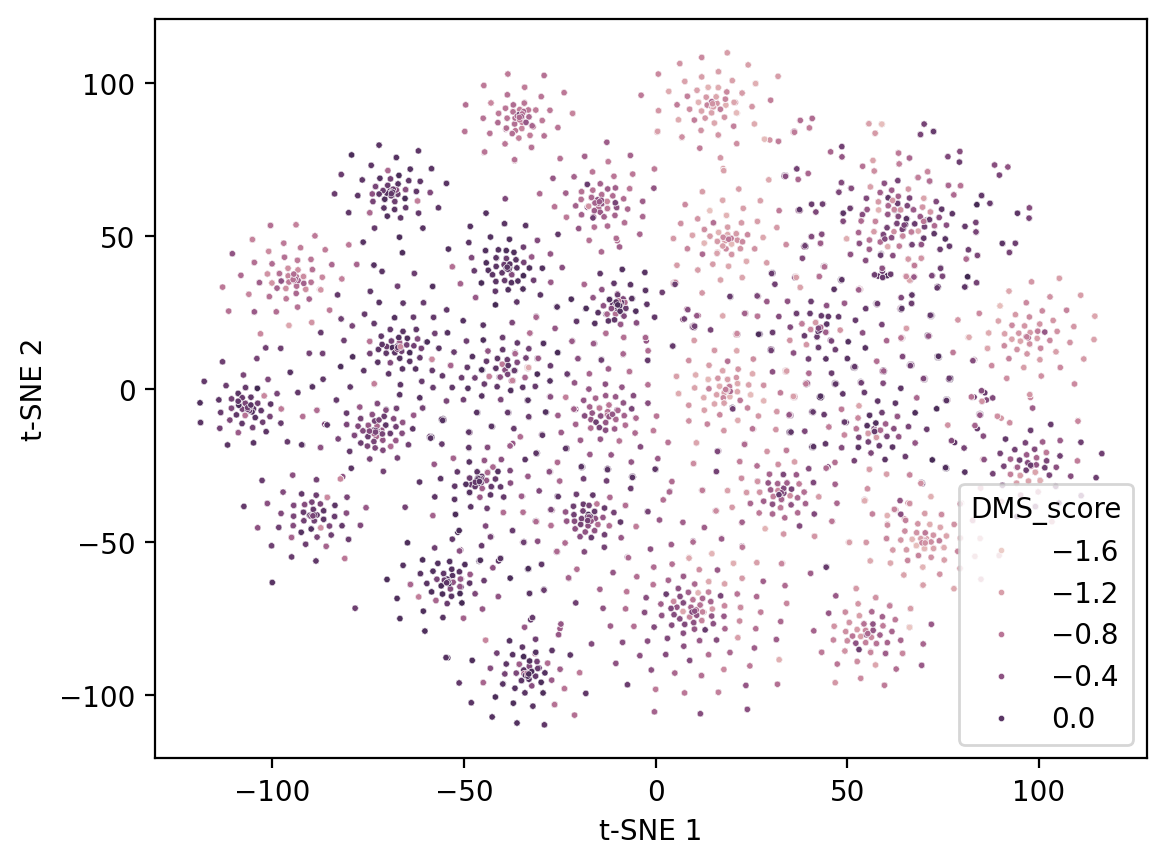

In [13]:
sns.scatterplot(tsne, x='t-SNE 1', y='t-SNE 2', s=5, hue='DMS_score');

## Random split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = RandomForestRegressor(
    random_state=42, # for reproducibility
    n_estimators=5   # default is 100 estimators, we used 5 to save time here
)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=42)

Test RMSE: 0.1744
Test R2: 0.8395


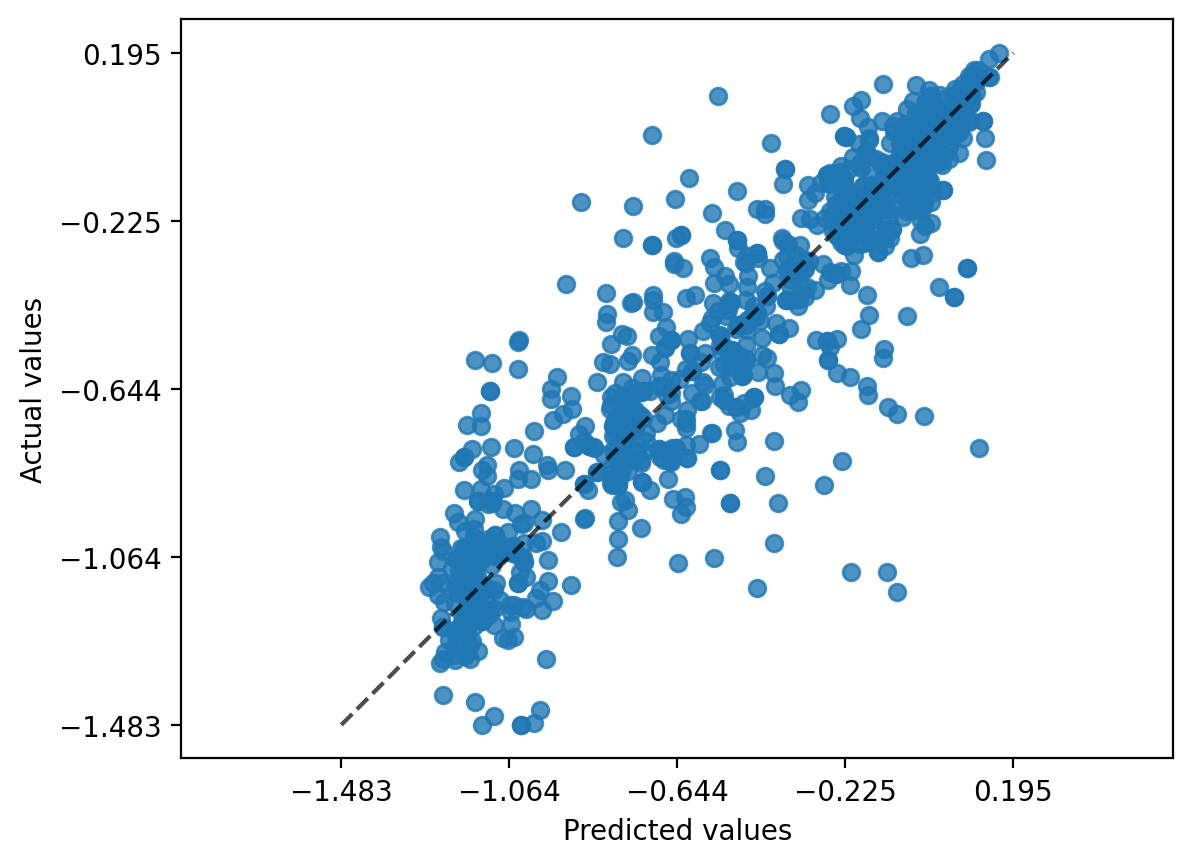

In [16]:
# Test model
y_test_pred = model.predict(X_test)

print(f'Test RMSE: {metrics.root_mean_squared_error(y_test, y_test_pred):.4f}')
print(f'Test R2: {metrics.r2_score(y_test, y_test_pred):.4f}')

metrics.PredictionErrorDisplay.from_predictions(y_test, y_test_pred, kind="actual_vs_predicted");

## Evaluating a regressor as a classifier

<Axes: ylabel='Frequency'>

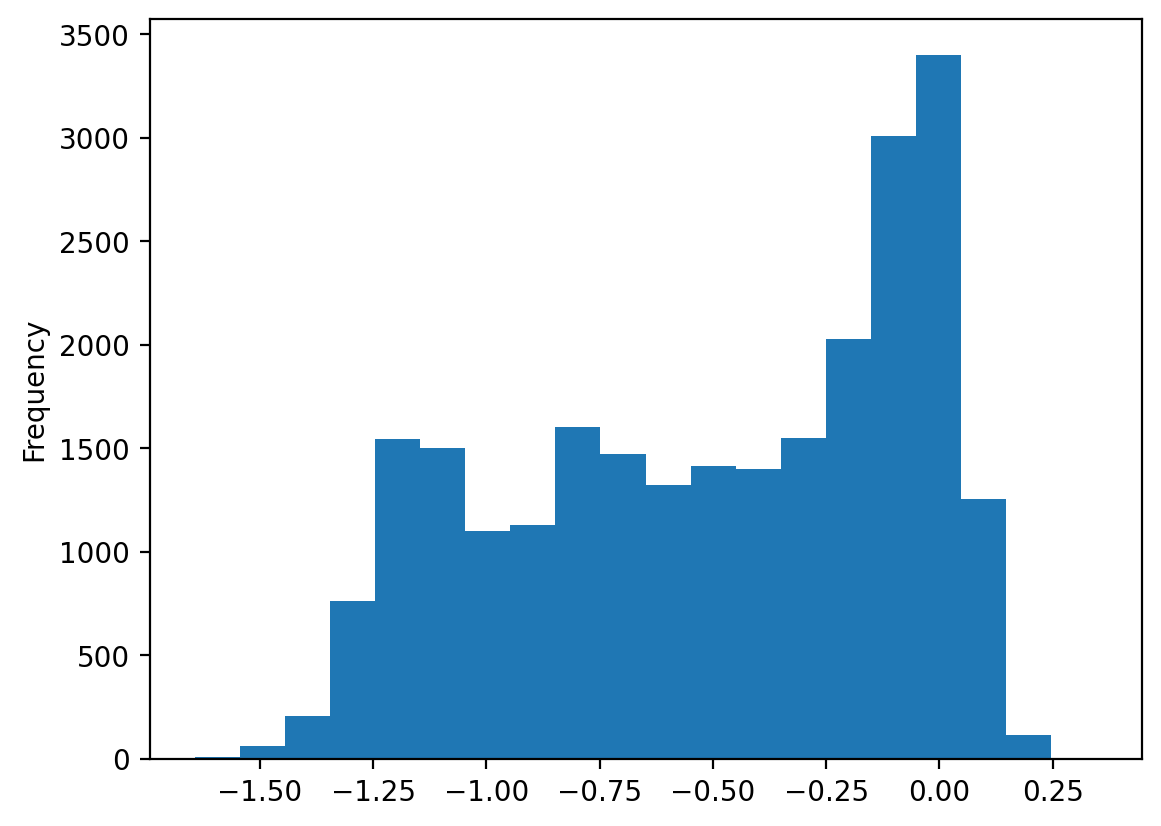

In [91]:
y.plot.hist(bins=20)

In [92]:
worst_mutants = (y < -1.0)
worst_mutants.head()

0    False
1    False
2     True
3    False
4     True
Name: DMS_score, dtype: bool

In [93]:
worst_mutants.value_counts()

DMS_score
False    20218
True      4655
Name: count, dtype: int64

In [97]:
worst_mutants_test = worst_mutants.loc[y_test.index]
worst_mutants_test.value_counts()

DMS_score
False    3974
True      818
Name: count, dtype: int64

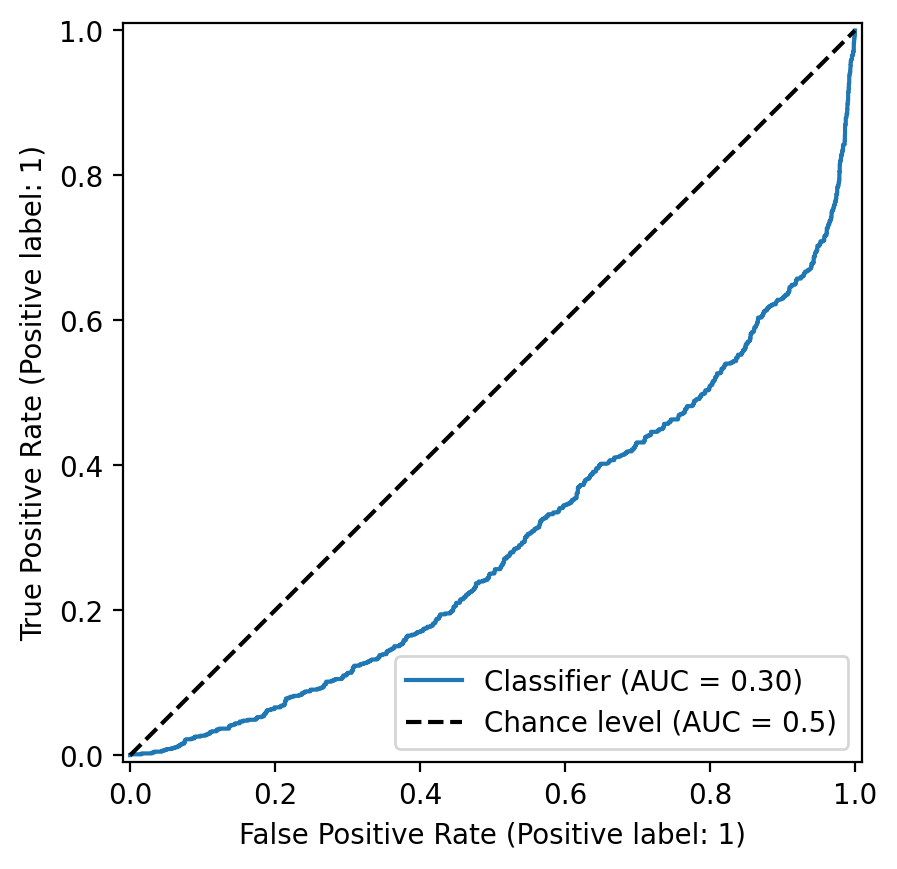

In [102]:
metrics.RocCurveDisplay.from_predictions(
    y_true = worst_mutants_test, 
    y_pred = y_test_pred,
    plot_chance_level = True
);

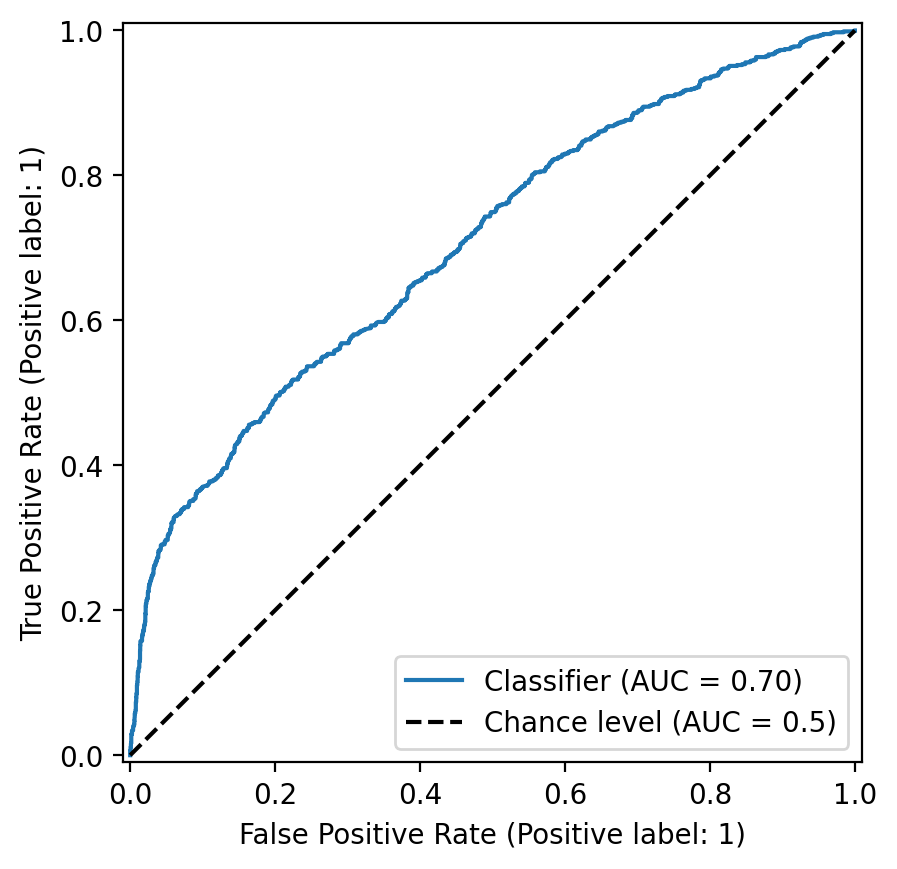

In [103]:
metrics.RocCurveDisplay.from_predictions(
    y_true = worst_mutants_test, 
    y_pred = -y_test_pred,
    plot_chance_level = True
);

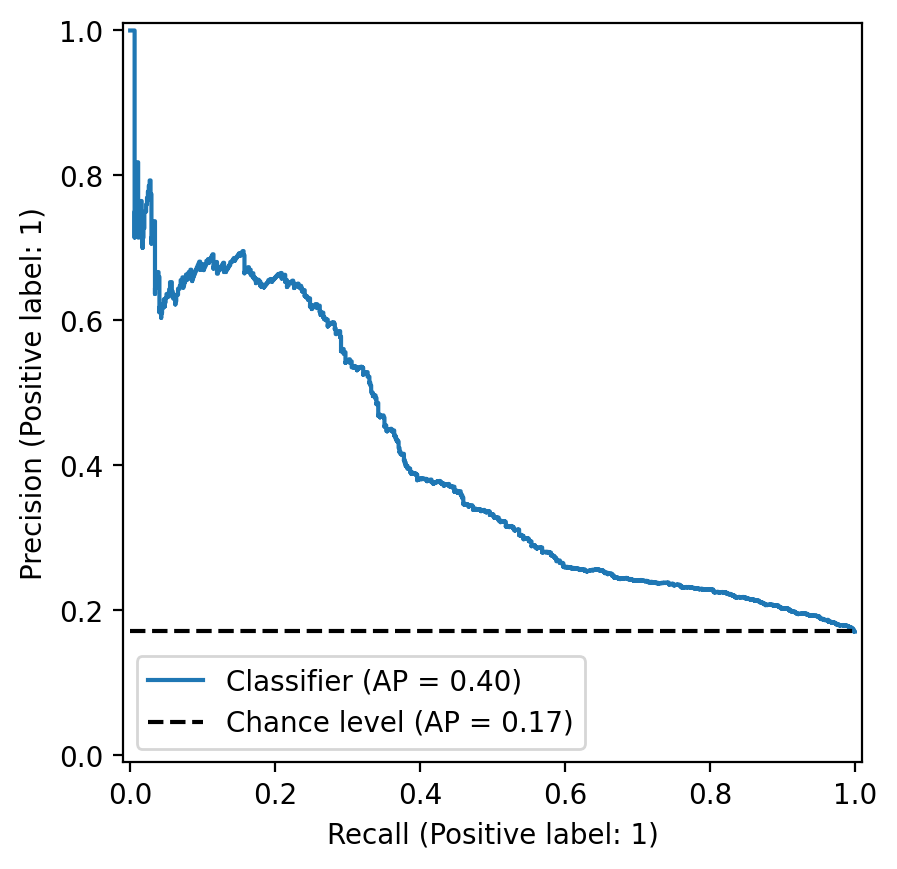

In [104]:
metrics.PrecisionRecallDisplay.from_predictions(
    y_true = worst_mutants_test, 
    y_pred = -y_test_pred,
    plot_chance_level = True
);

## Feature importance

In [18]:
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
importance.head()

17_S    0.081557
19_P    0.080351
40_Y    0.079991
37_E    0.076294
6_H     0.060366
dtype: float64

<Axes: >

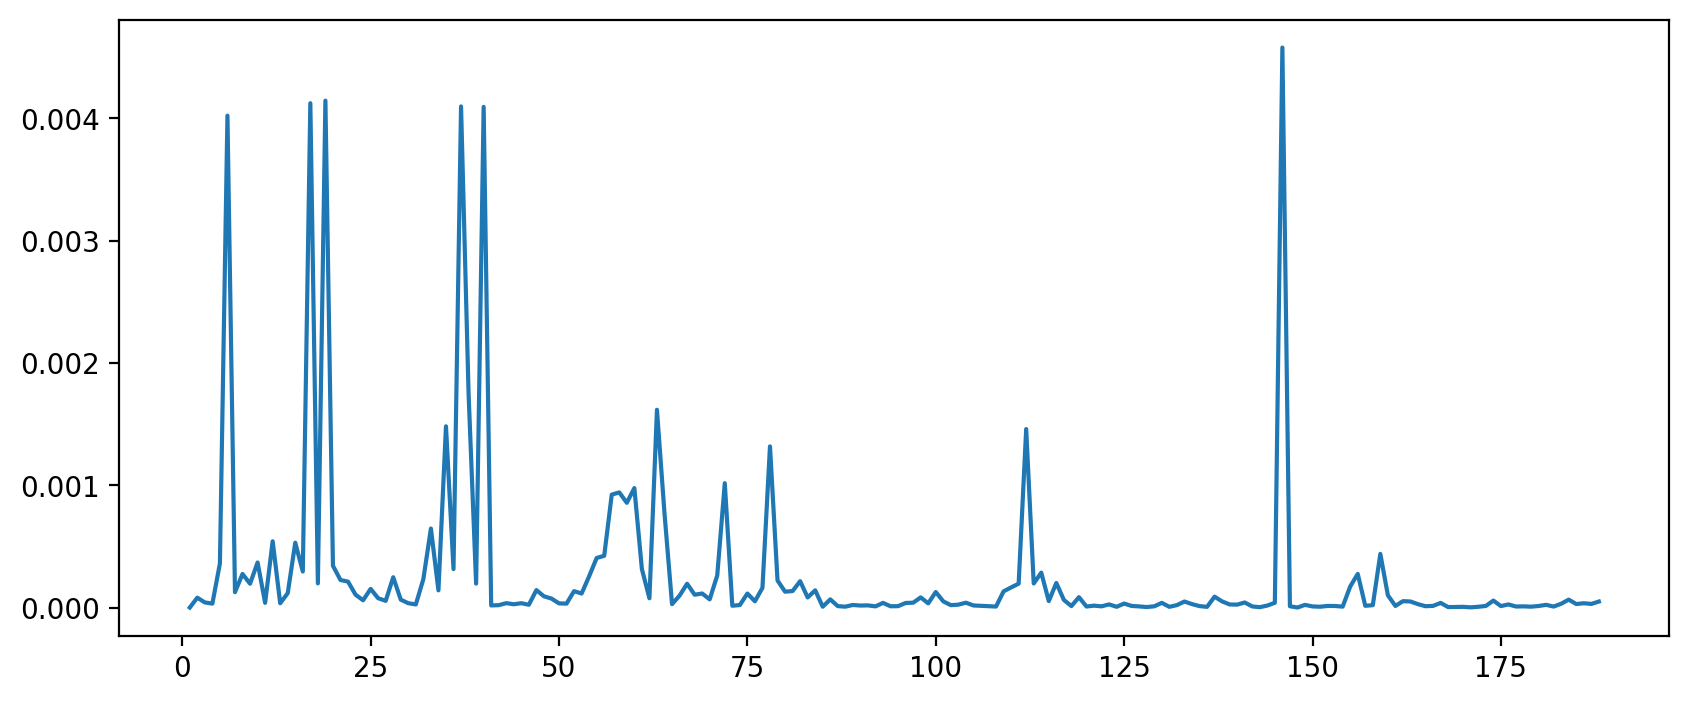

In [107]:
positions = importance.index.map(lambda column: int(column.split('_')[0]))
position_importance = importance.groupby(positions).mean().sort_index()
position_importance.name = 'Mean feature importance'

position_importance.plot(figsize=(10, 4))

In [108]:
position_importance.sort_values(ascending=False).head(10)

146    0.004578
19     0.004144
17     0.004123
37     0.004097
40     0.004093
6      0.004021
38     0.001749
63     0.001617
35     0.001482
112    0.001459
Name: Mean feature importance, dtype: float64

In [109]:
position_importance.to_csv('../../data/proteingym/kras_binding/rf_position_importance.csv')

## Lasso model ("deconvolution")

In [35]:
from sklearn.linear_model import Lasso

lasso = Lasso(
    alpha=0.0001 # alpha controls regularization strength - higher -> more columns are ignored (their coeff goes to 0)
)  
lasso.fit(X, y)

Lasso(alpha=0.0001)

In [36]:
# the intercept (bias) offsets all predictions, should be close to the mean of the y distribution
intercept = lasso.intercept_
intercept

np.float64(-14.376968821931266)

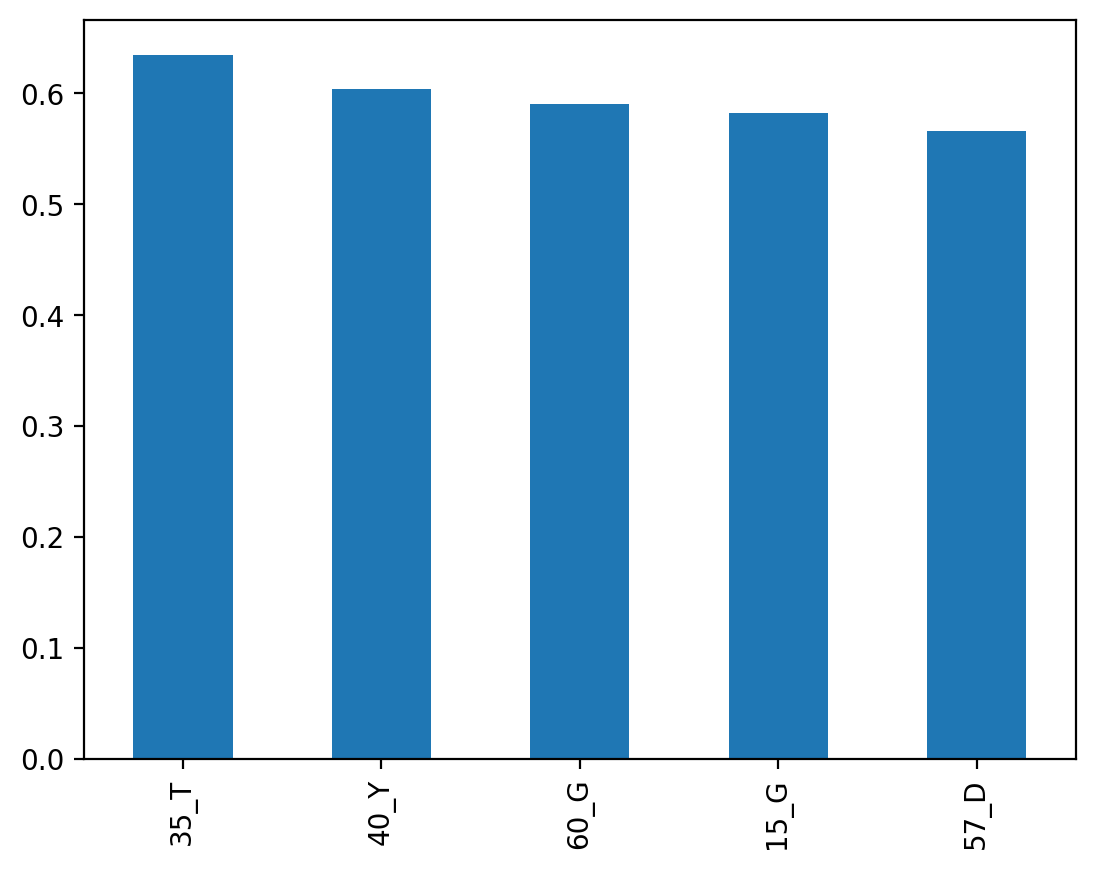

<Axes: >

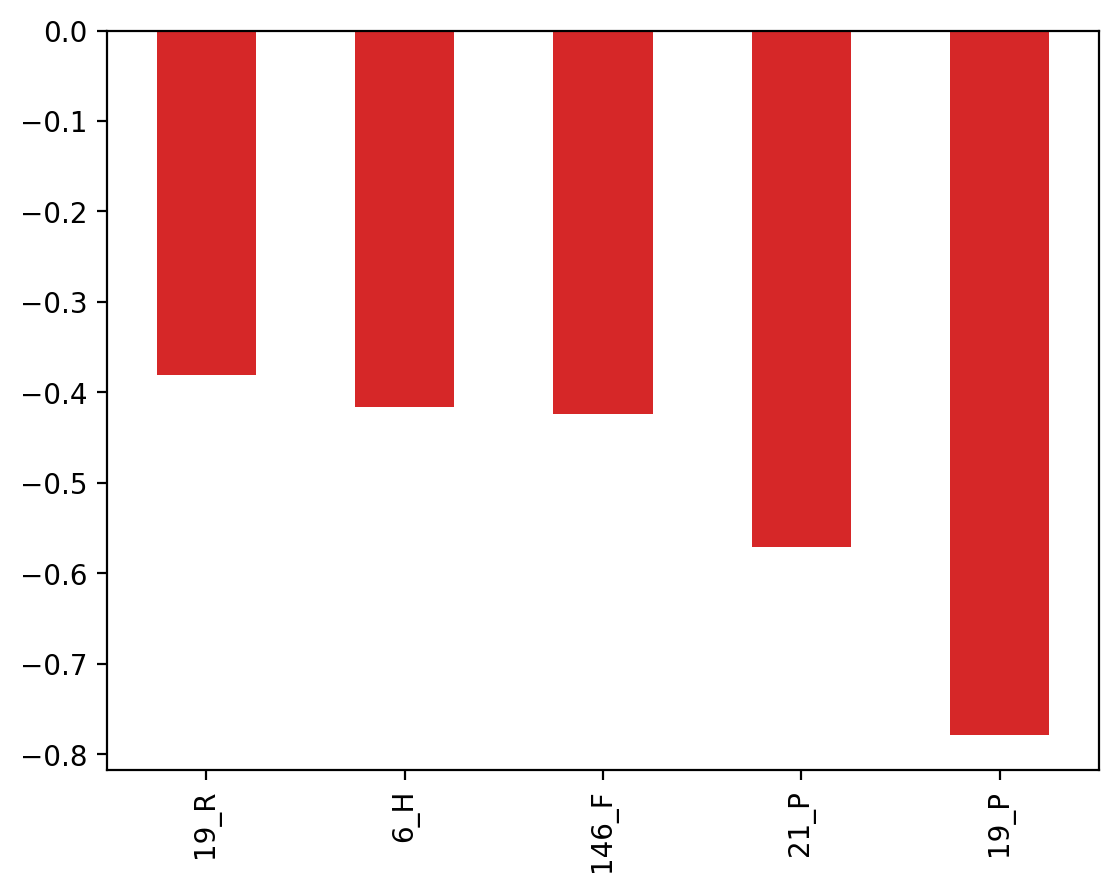

In [115]:
# the coefficients correspond to the impact of each feature column (residue at a position) on the target variable
# positive -> residue increases y (preserves binding)
# negative -> residue decreases y (disrupts binding)
coef = pd.Series(lasso.coef_, index=X.columns).sort_values(ascending=False)
coef.name = 'Coef'
coef.head().plot.bar(color='tab:blue')
plt.show()
coef.tail().plot.bar(color='tab:red')

<Axes: ylabel='Frequency'>

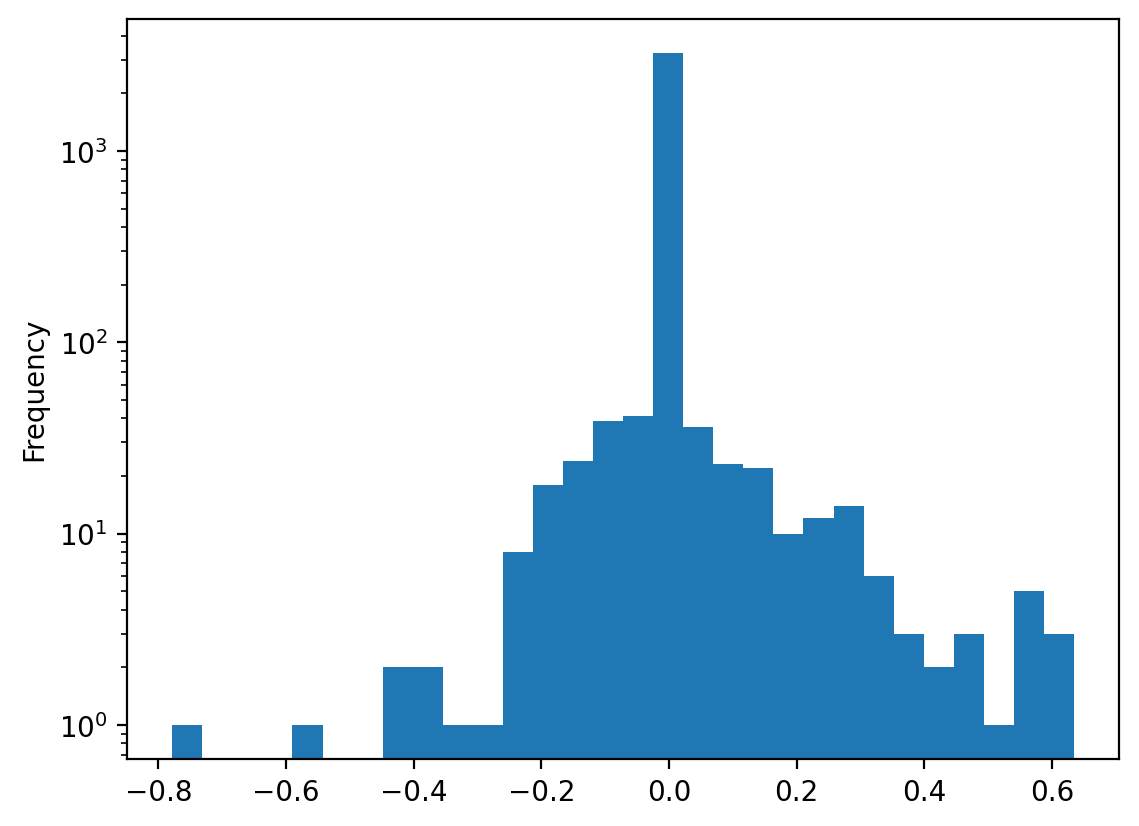

In [43]:
coef.plot.hist(bins=30, logy=True)

In [116]:
coef.to_csv('../../data/proteingym/kras_binding/deconvolution_coef.csv')

## Per-position split

In [44]:
consensus = msa.apply(lambda col: col.value_counts().index[0])
consensus

1      M
2      T
3      E
4      Y
5      K
      ..
184    K
185    C
186    V
187    I
188    M
Length: 188, dtype: object

In [45]:
''.join(consensus)

'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQGVDDAFYTLVREIRKHKEKMSKDGKKKKKKSKTKCVIM'

In [46]:
mutated_positions = msa != consensus
mutated_positions.head()

1      2      3      4      5      6      7      8      9      10   ...  \
0  False  False  False  False  False  False  False  False  False  False  ...   
1  False  False  False  False  False  False  False  False  False  False  ...   
2  False  False  False  False  False  False  False  False  False  False  ...   
3  False  False  False  False  False  False  False  False  False  False  ...   
4  False  False  False  False  False  False  False  False  False  False  ...   

     179    180    181    182    183    184    185    186    187    188  
0  False  False  False  False  False  False  False  False  False  False  
1  False  False  False  False  False  False  False  False  False  False  
2  False  False  False  False  False  False  False  False  False  False  
3  False  False  False  False  False  False  False  False  False  False  
4  False  False  False  False  False  False  False  False  False  False  

[5 rows x 188 columns]

In [58]:
valid_positions = list(range(1, 25))
test_positions = list(range(50, 70))

<Axes: >

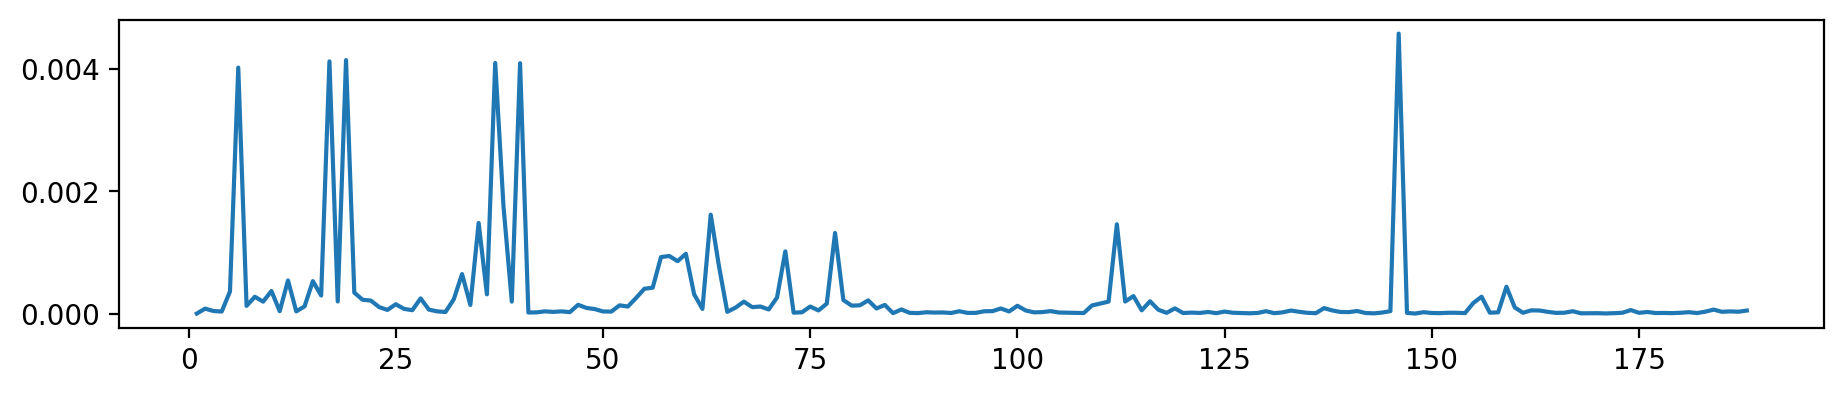

In [59]:
position_importance.plot(figsize=(11, 2))

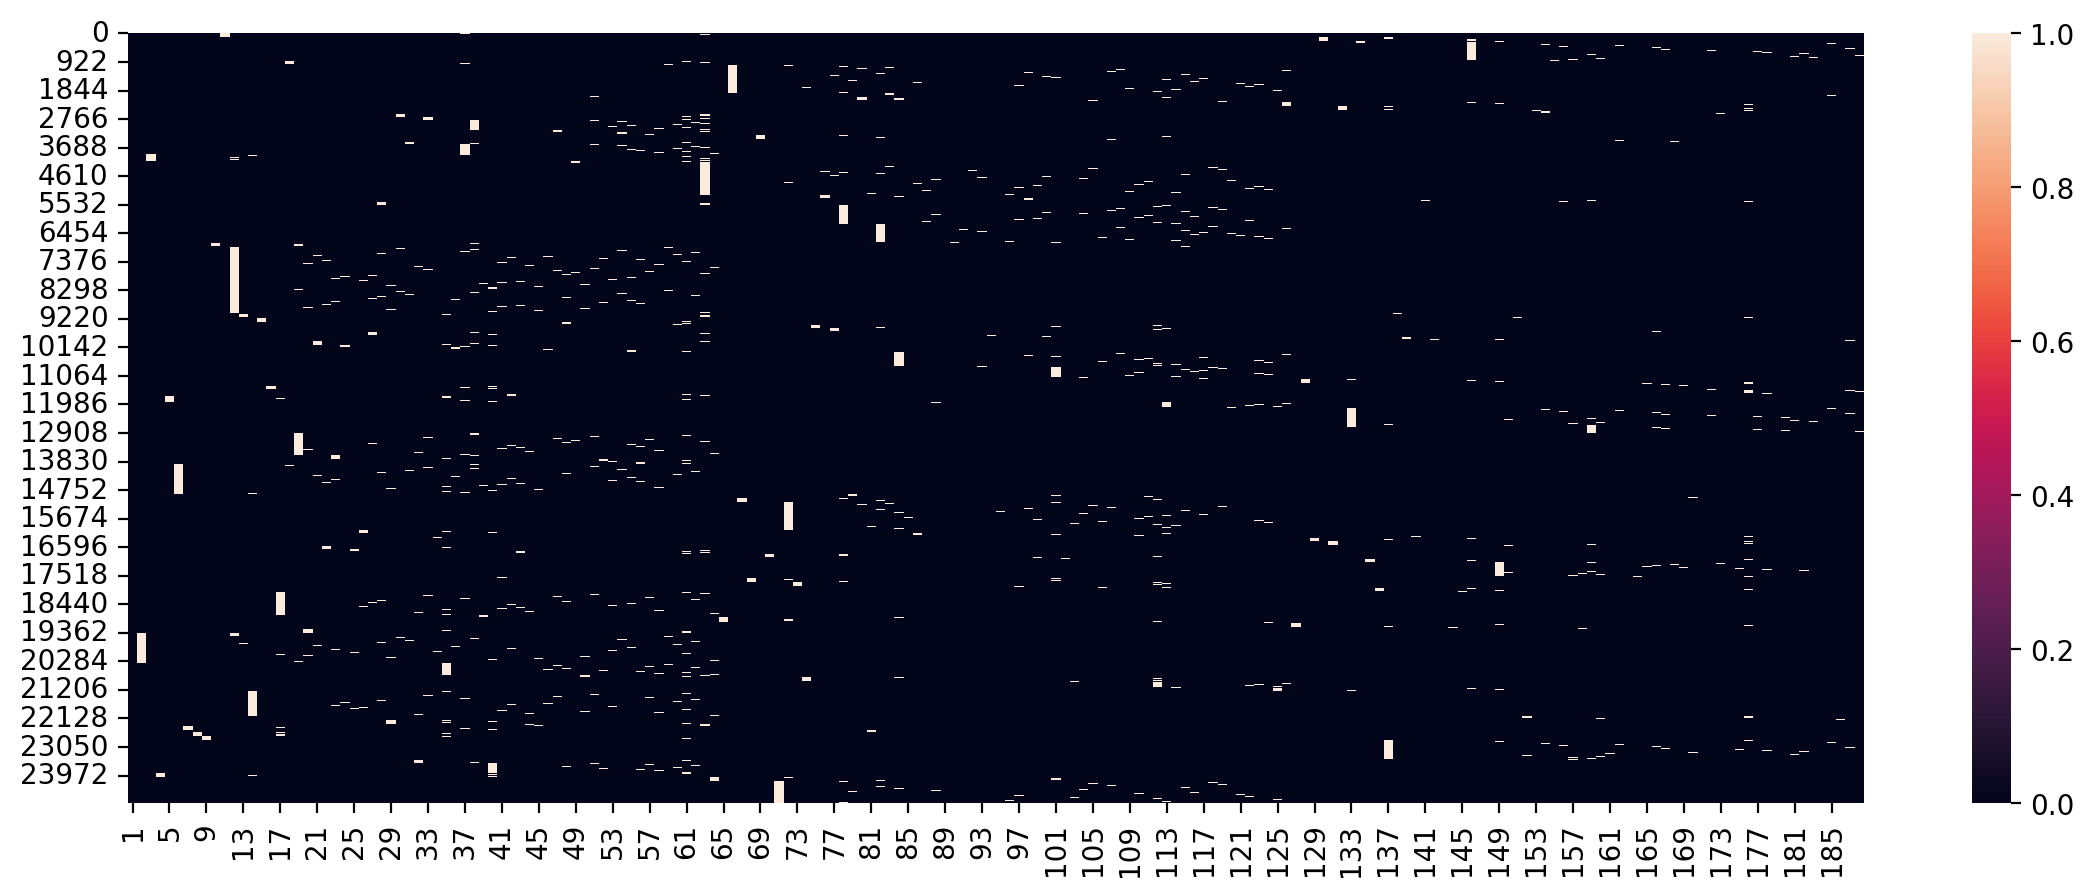

In [60]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.heatmap(mutated_positions);

In [65]:
train_idx = ~mutated_positions[valid_positions].any(axis=1) & ~mutated_positions[test_positions].any(axis=1)
valid_idx = mutated_positions[valid_positions].any(axis=1)
test_idx = mutated_positions[test_positions].any(axis=1) & ~mutated_positions[valid_positions].any(axis=1)

In [62]:
train_idx.sum(), valid_idx.sum(), test_idx.sum()

(np.int64(11488), np.int64(8593), np.int64(7672))

In [66]:
X_train, y_train = X[train_idx], y[train_idx]
X_valid, y_valid = X[valid_idx], y[valid_idx]
X_test, y_test = X[test_idx], y[test_idx]

In [68]:
model = RandomForestRegressor(random_state=42, n_estimators=5)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=42)

Validation RMSE: 0.6819
Validation R2: -1.0928


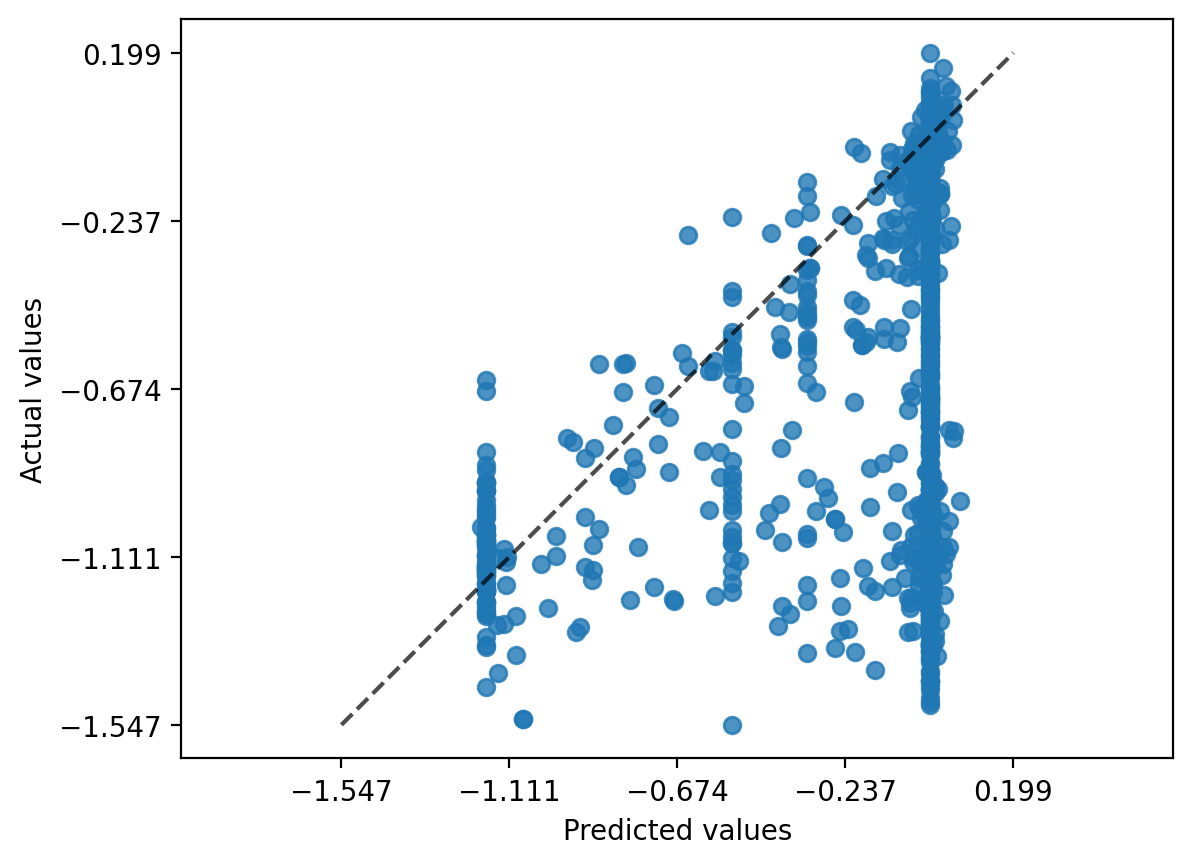

In [69]:
# Validate model
y_valid_pred = model.predict(X_valid)

print(f'Validation RMSE: {metrics.root_mean_squared_error(y_valid, y_valid_pred):.4f}')
print(f'Validation R2: {metrics.r2_score(y_valid, y_valid_pred):.4f}')

metrics.PredictionErrorDisplay.from_predictions(y_valid, y_valid_pred, kind="actual_vs_predicted");

In [70]:
y_valid.std()

np.float64(0.47136564131205655)

<Axes: >

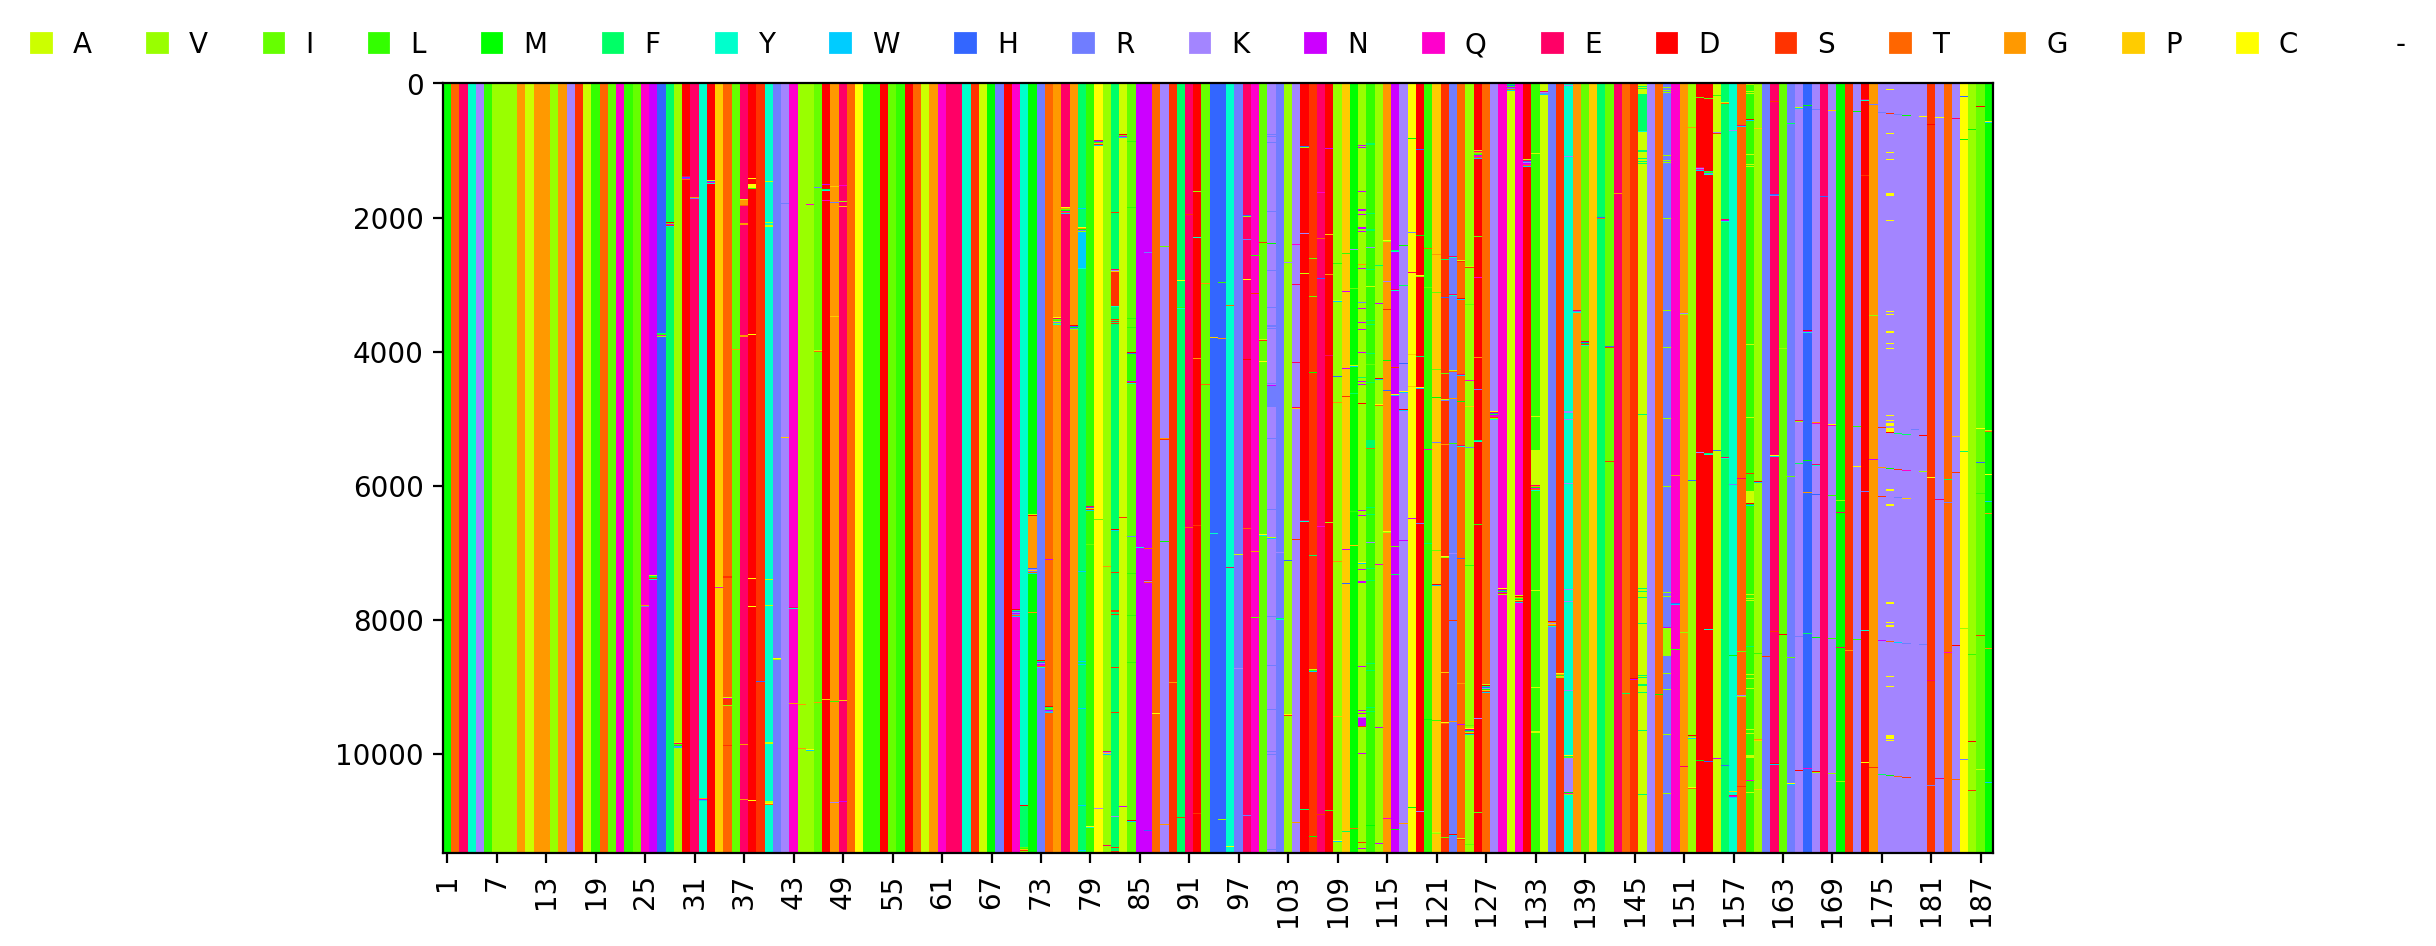

In [71]:
train_msa = msa.loc[X_train.index]
plot_msa(train_msa, figsize=(10, 5))

<Axes: >

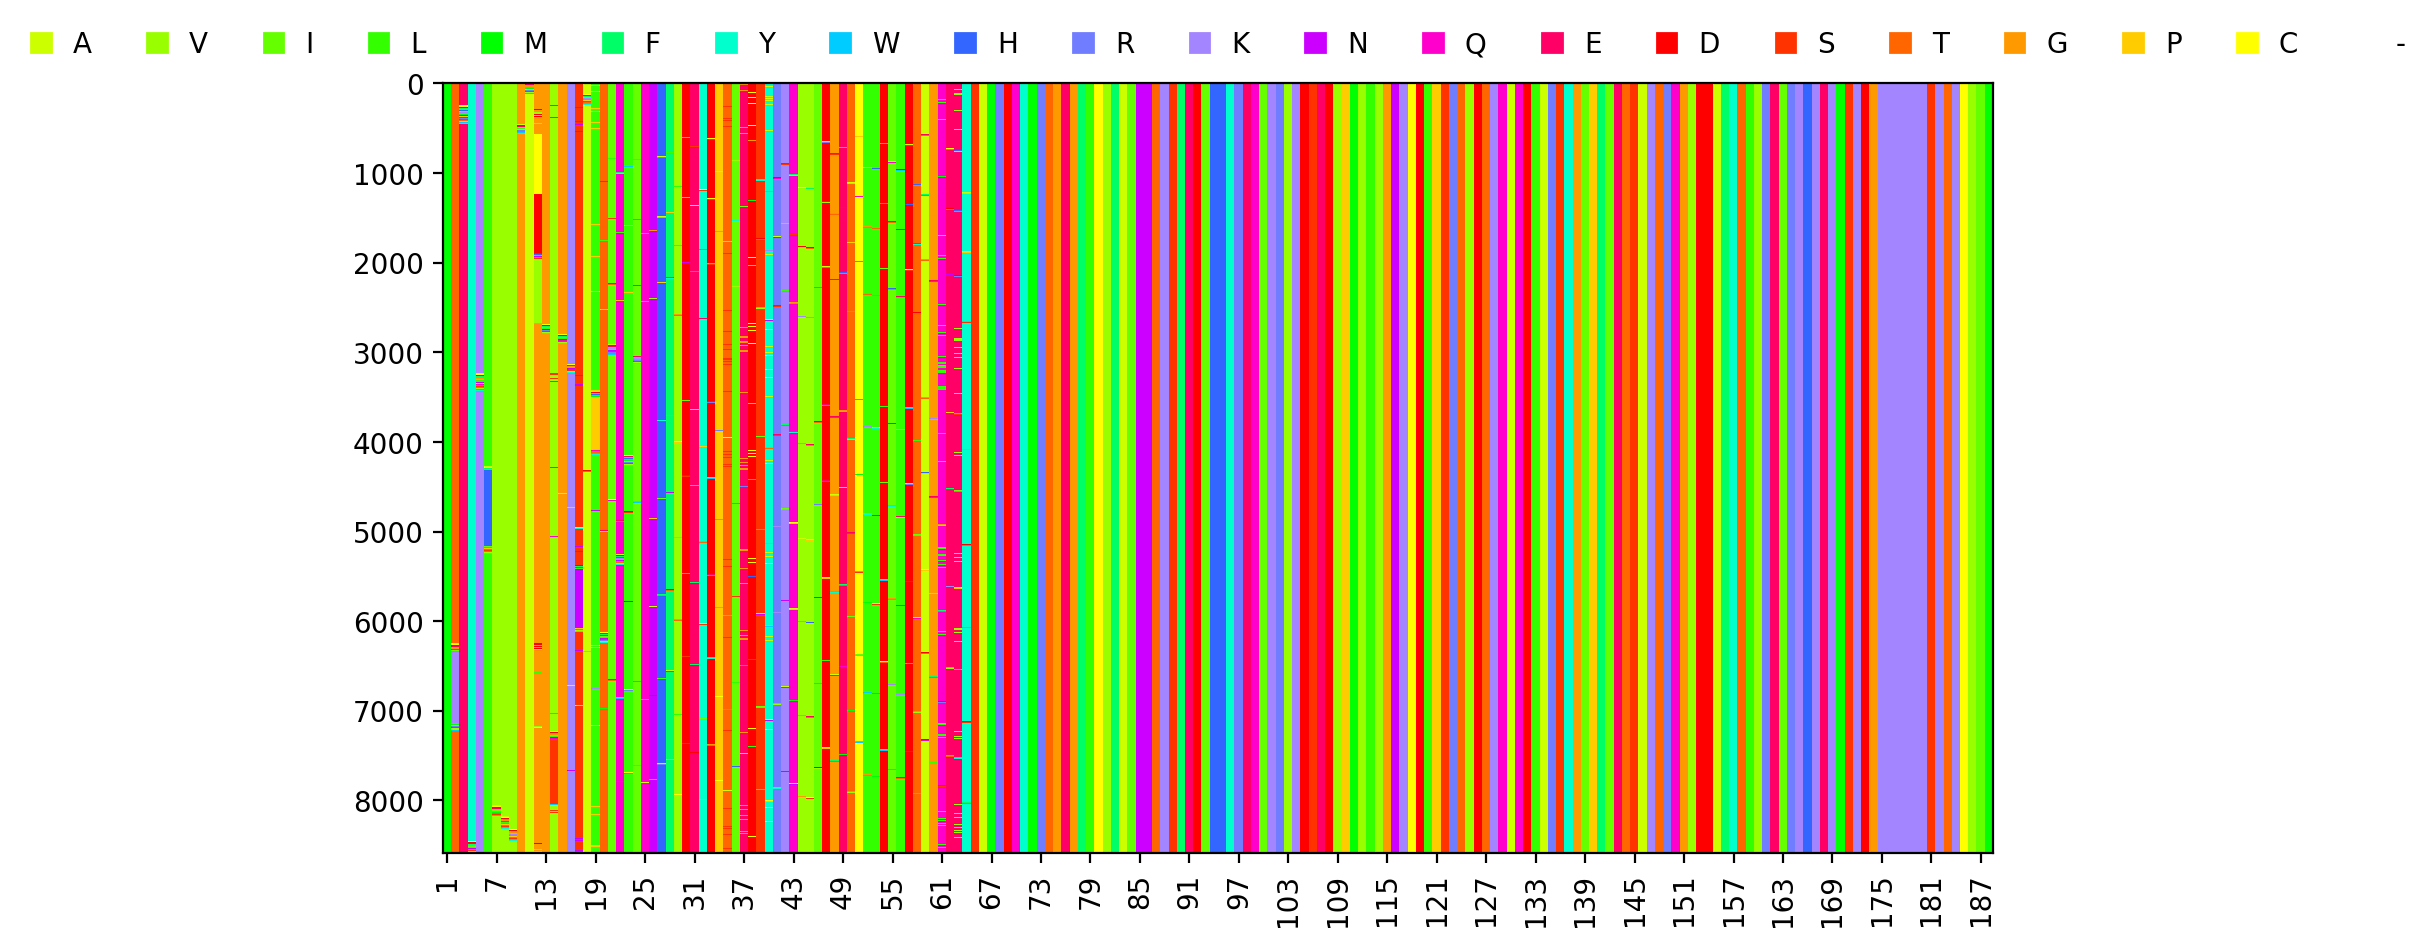

In [72]:
valid_msa = msa.loc[X_valid.index]
plot_msa(valid_msa, figsize=(10, 5))

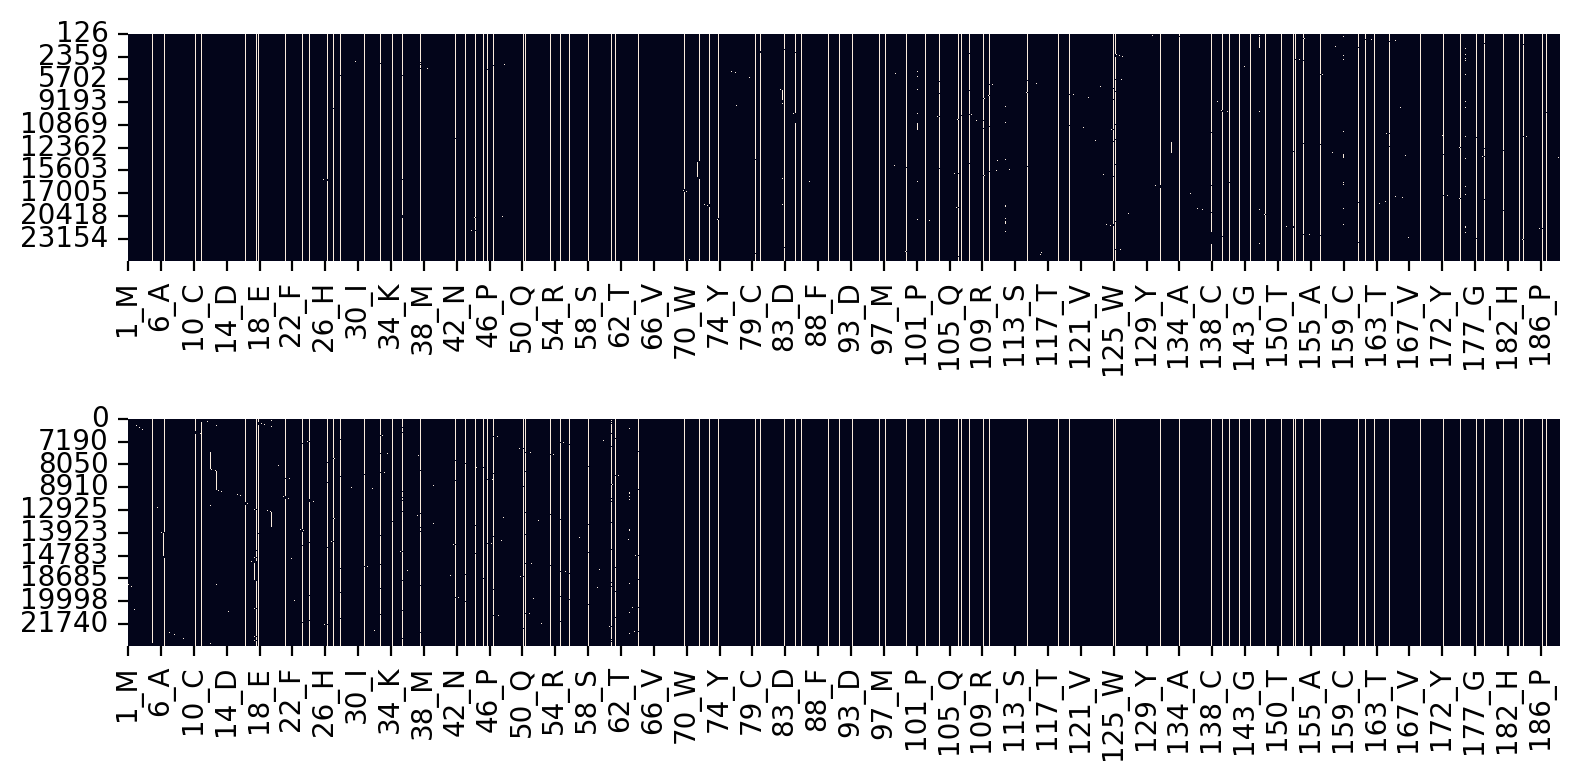

In [73]:
fig, axes = plt.subplots(2, figsize=(8, 4))

sns.heatmap(X_train, ax=axes[0], cbar=False)
sns.heatmap(X_valid, ax=axes[1], cbar=False);

fig.tight_layout();

## Global representation

See https://biopython.org/docs/1.76/api/Bio.SeqUtils.ProtParam.html

In [74]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

a = ProteinAnalysis('ELVISISALIVE')
print(a.count_amino_acids())

{'A': 1, 'C': 0, 'D': 0, 'E': 2, 'F': 0, 'G': 0, 'H': 0, 'I': 3, 'K': 0, 'L': 2, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 2, 'T': 0, 'V': 2, 'W': 0, 'Y': 0}


In [75]:
a.isoelectric_point()

4.240495872497559

In [76]:
a.molecular_weight()

1285.5258000000001

In [77]:
a.gravy(scale='BlackMould')

0.6487499999999999

In [78]:
def featurize(seq):
    a = ProteinAnalysis(seq)
    return pd.Series({
        'isoelectric_point': a.isoelectric_point(),
        'instability_index': a.instability_index(),
        'molar_extinction_coefficient': a.molar_extinction_coefficient()[0],
        'charge_at_pH_5_5': a.charge_at_pH(5.5),
        'charge_at_pH_7_4': a.charge_at_pH(7.4),
        'gravy_hydrophobicity_kd': a.gravy(scale='KyteDoolitle'),
        'gravy_hydrophobicity_bm': a.gravy(scale='BlackMould'),
        **a.amino_acids_percent
    })

In [79]:
featurize('ELVISISALIVE')

isoelectric_point                4.240496
instability_index                2.091667
molar_extinction_coefficient     0.000000
charge_at_pH_5_5                -1.691627
charge_at_pH_7_4                -2.329385
gravy_hydrophobicity_kd          1.891667
gravy_hydrophobicity_bm          0.648750
A                                8.333333
C                                0.000000
D                                0.000000
E                               16.666667
F                                0.000000
G                                0.000000
H                                0.000000
I                               25.000000
K                                0.000000
L                               16.666667
M                                0.000000
N                                0.000000
P                                0.000000
Q                                0.000000
R                                0.000000
S                               16.666667
T                                0

In [80]:
X = df['mutated_sequence'].apply(featurize)
X.head()

isoelectric_point  instability_index  molar_extinction_coefficient  \
0           8.179765          42.714415                       11920.0   
1           8.434028          43.002713                       11920.0   
2           8.488181          39.352713                       11920.0   
3           8.488181          40.579309                       11920.0   
4           8.179765          43.738883                       11920.0   

   charge_at_pH_5_5  charge_at_pH_7_4  gravy_hydrophobicity_kd  \
0          6.594967          1.257678                -0.570745   
1          7.560385          2.232728                -0.538830   
2          7.513135          2.256557                -0.554255   
3          7.513135          2.256557                -0.529787   
4          6.594967          1.257678                -0.599468   

   gravy_hydrophobicity_bm         A         C         D  ...         M  \
0                 0.477628  4.255319  2.659574  8.510638  ...  3.191489   
1                 0.481096  4.255319  3.191489  7.978723  ...  3.191489   
2                 0.480064  4.255319  2.659574  8.510638  ...  3.191489   
3                 0.481787  4.255319  2.659574  8.510638  ...  3.191489   
4                 0.476394  4.255319  2.659574  8.510638  ...  3.191489   

         N         P         Q         R         S         T         V    W  \
0  2.12766  2.127660  4.787234  5.319149  5.319149  6.914894  8.510638  0.0   
1  2.12766  2.127660  4.787234  5.319149  5.319149  6.914894  8.510638  0.0   
2  2.12766  2.127660  4.787234  5.319149  5.319149  6.914894  8.510638  0.0   
3  2.12766  2.127660  4.787234  5.319149  5.319149  6.914894  9.042553  0.0   
4  2.12766  2.659574  4.787234  5.319149  5.319149  6.914894  8.510638  0.0   

          Y  
0  4.255319  
1  4.255319  
2  4.255319  
3  4.255319  
4  4.255319  

[5 rows x 27 columns]

In [81]:
tsne = TSNE(perplexity=100).fit_transform(X)
tsne = pd.DataFrame(tsne, columns=['t-SNE 1', 't-SNE 2'], index=X.index)

tsne = tsne.join(df).join(X)

tsne.head()

t-SNE 1    t-SNE 2     mutant  \
0  17.311275   6.473626       A11C   
1  -9.214736 -18.251566  A11C:D38C   
2   7.752997 -66.450630  A11C:E37G   
3  -7.154182 -65.089920  A11C:E63V   
4  23.277136  48.340298  A11C:L19P   

                                    mutated_sequence  DMS_score  \
0  MTEYKLVVVGCGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...  -0.018170   
1  MTEYKLVVVGCGGVGKSALTIQLIQNHFVDEYDPTIECSYRKQVVI...  -0.572733   
2  MTEYKLVVVGCGGVGKSALTIQLIQNHFVDEYDPTIGDSYRKQVVI...  -1.135869   
3  MTEYKLVVVGCGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...  -0.541015   
4  MTEYKLVVVGCGGVGKSAPTIQLIQNHFVDEYDPTIEDSYRKQVVI...  -1.243287   

   DMS_score_bin  mutation_depth  fold_rand_multiples  isoelectric_point  \
0              1               1                    4           8.179765   
1              0               2                    1           8.434028   
2              0               2                    2           8.488181   
3              0               2                    0           8.488181   
4              0               2                    2           8.179765   

   instability_index  ...         M        N         P         Q         R  \
0          42.714415  ...  3.191489  2.12766  2.127660  4.787234  5.319149   
1          43.002713  ...  3.191489  2.12766  2.127660  4.787234  5.319149   
2          39.352713  ...  3.191489  2.12766  2.127660  4.787234  5.319149   
3          40.579309  ...  3.191489  2.12766  2.127660  4.787234  5.319149   
4          43.738883  ...  3.191489  2.12766  2.659574  4.787234  5.319149   

          S         T         V    W         Y  
0  5.319149  6.914894  8.510638  0.0  4.255319  
1  5.319149  6.914894  8.510638  0.0  4.255319  
2  5.319149  6.914894  8.510638  0.0  4.255319  
3  5.319149  6.914894  9.042553  0.0  4.255319  
4  5.319149  6.914894  8.510638  0.0  4.255319  

[5 rows x 35 columns]

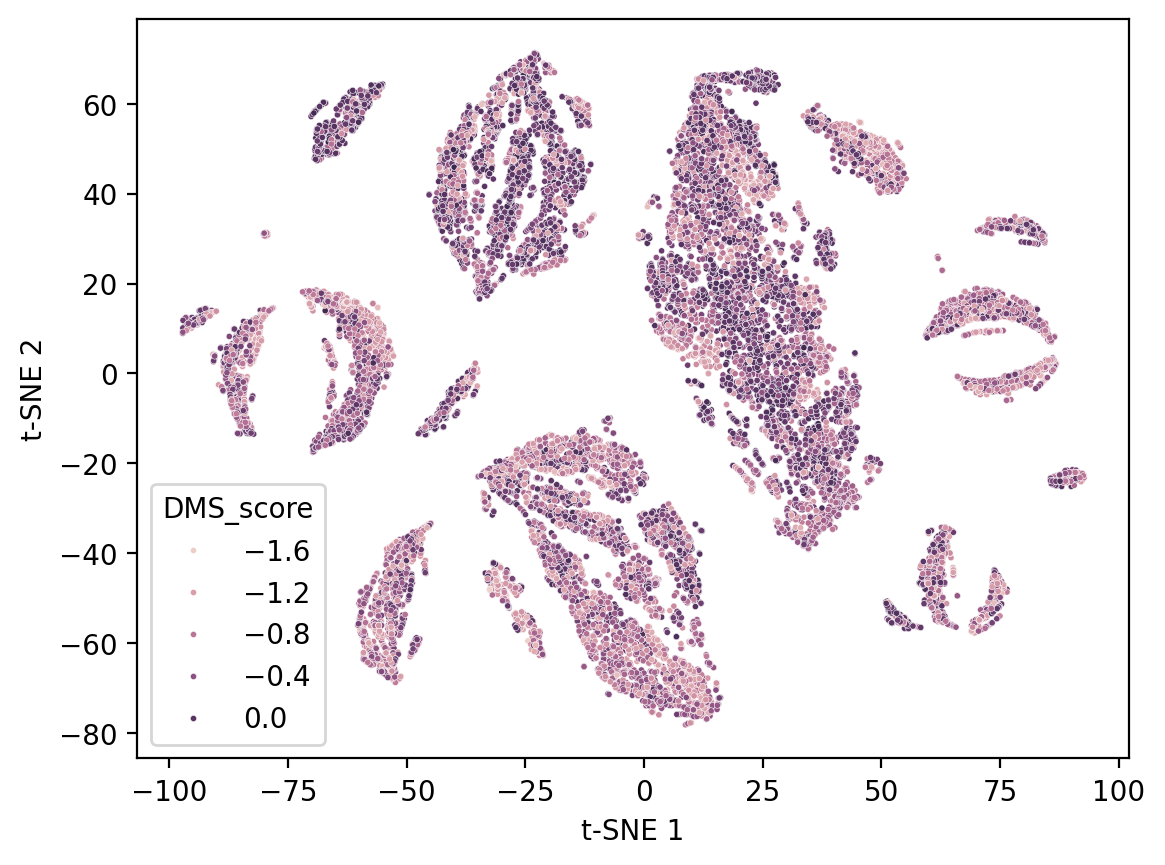

In [82]:
sns.scatterplot(tsne, x='t-SNE 1', y='t-SNE 2', s=5, hue='DMS_score');

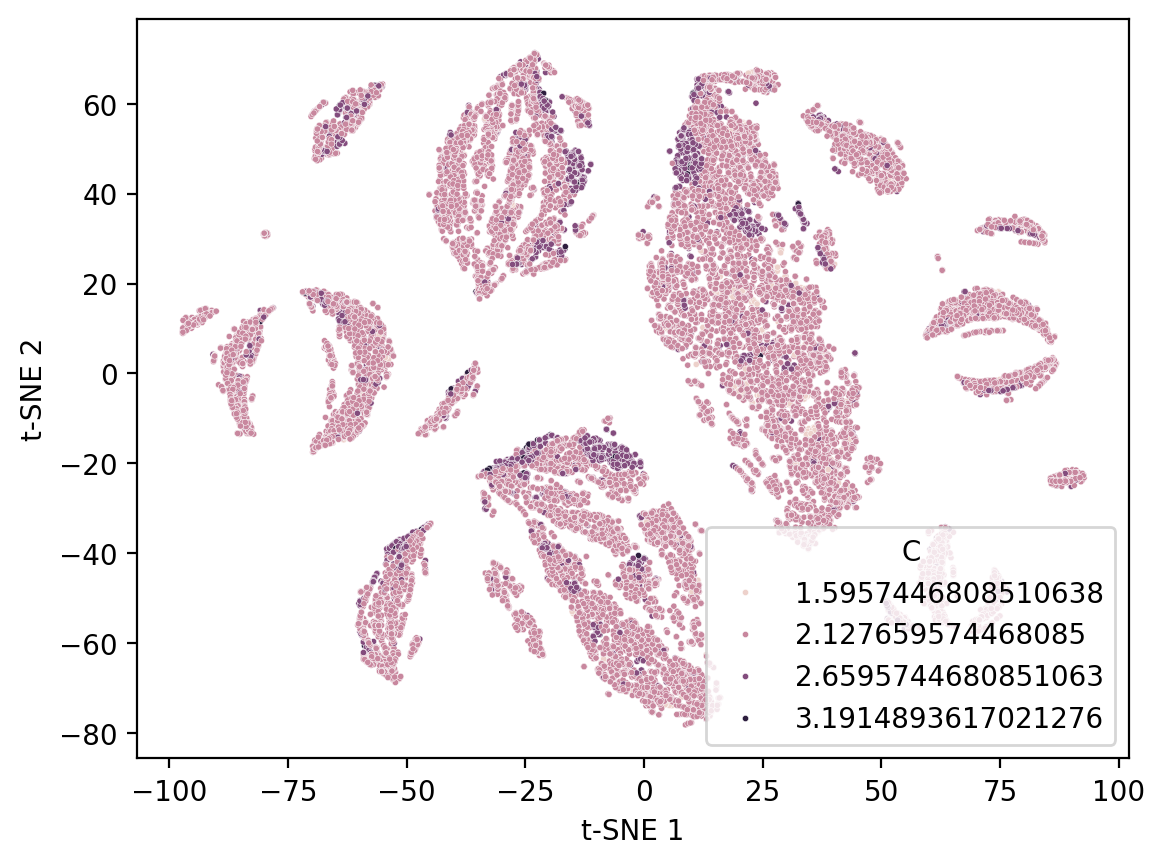

In [83]:
sns.scatterplot(tsne, x='t-SNE 1', y='t-SNE 2', s=5, hue='C');

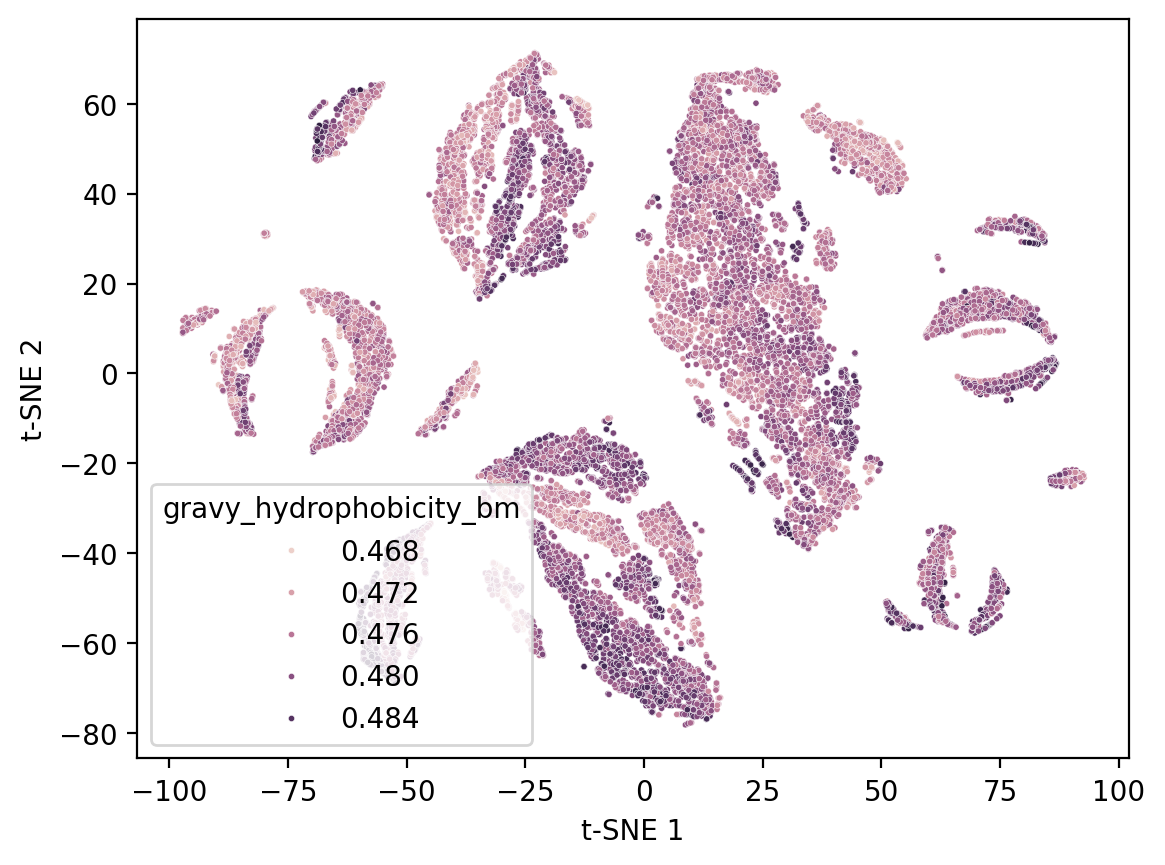

In [84]:
sns.scatterplot(tsne, x='t-SNE 1', y='t-SNE 2', s=5, hue='gravy_hydrophobicity_bm');

In [85]:
X_train, y_train = X[train_idx], y[train_idx]
X_valid, y_valid = X[valid_idx], y[valid_idx]
X_test, y_test = X[test_idx], y[test_idx]

In [86]:
model = RandomForestRegressor(random_state=42, n_estimators=5)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=42)

Validation RMSE: 0.5654
Validation R2: -0.4392


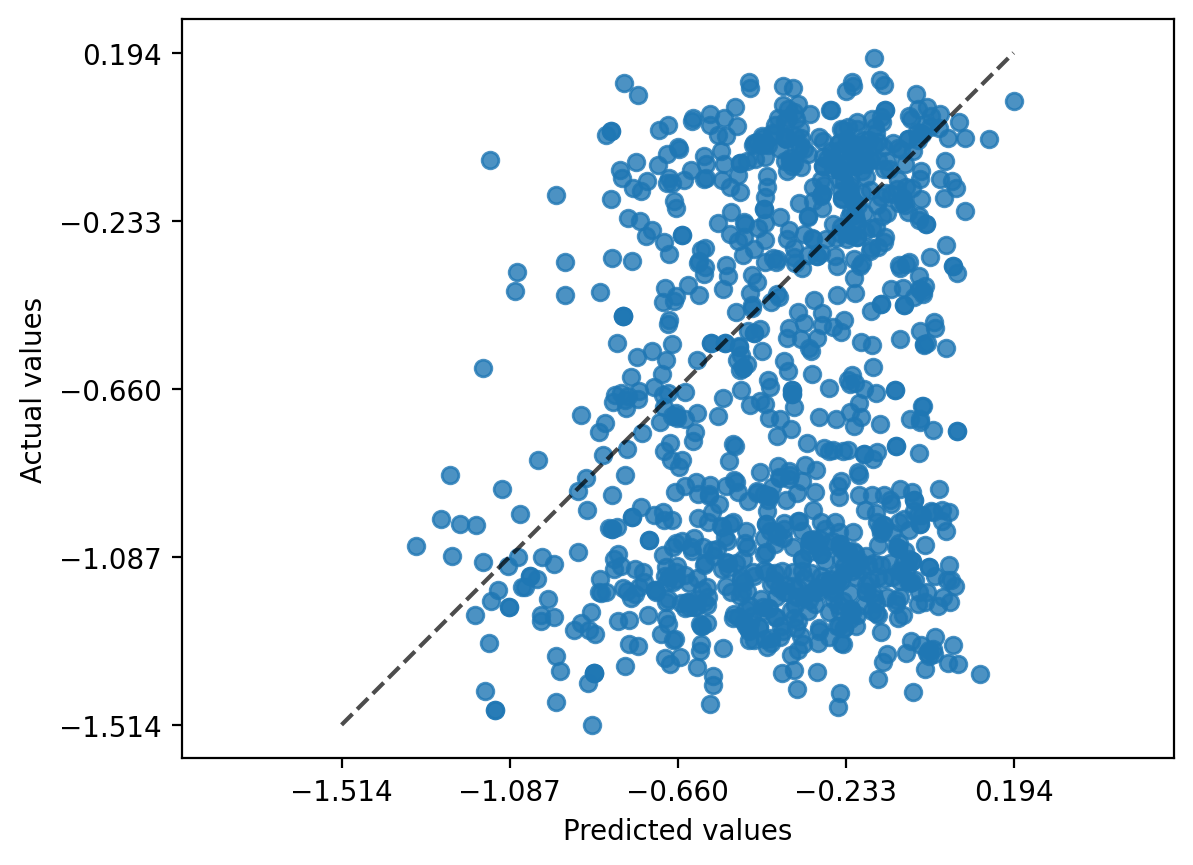

In [87]:
# Validate model
y_valid_pred = model.predict(X_valid)

print(f'Validation RMSE: {metrics.root_mean_squared_error(y_valid, y_valid_pred):.4f}')
print(f'Validation R2: {metrics.r2_score(y_valid, y_valid_pred):.4f}')

metrics.PredictionErrorDisplay.from_predictions(y_valid, y_valid_pred, kind="actual_vs_predicted");

In [88]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head()

instability_index          0.211197
gravy_hydrophobicity_kd    0.140836
A                          0.102195
gravy_hydrophobicity_bm    0.072977
F                          0.060537
dtype: float64

Test RMSE: 0.4013
Test R2: -0.0024


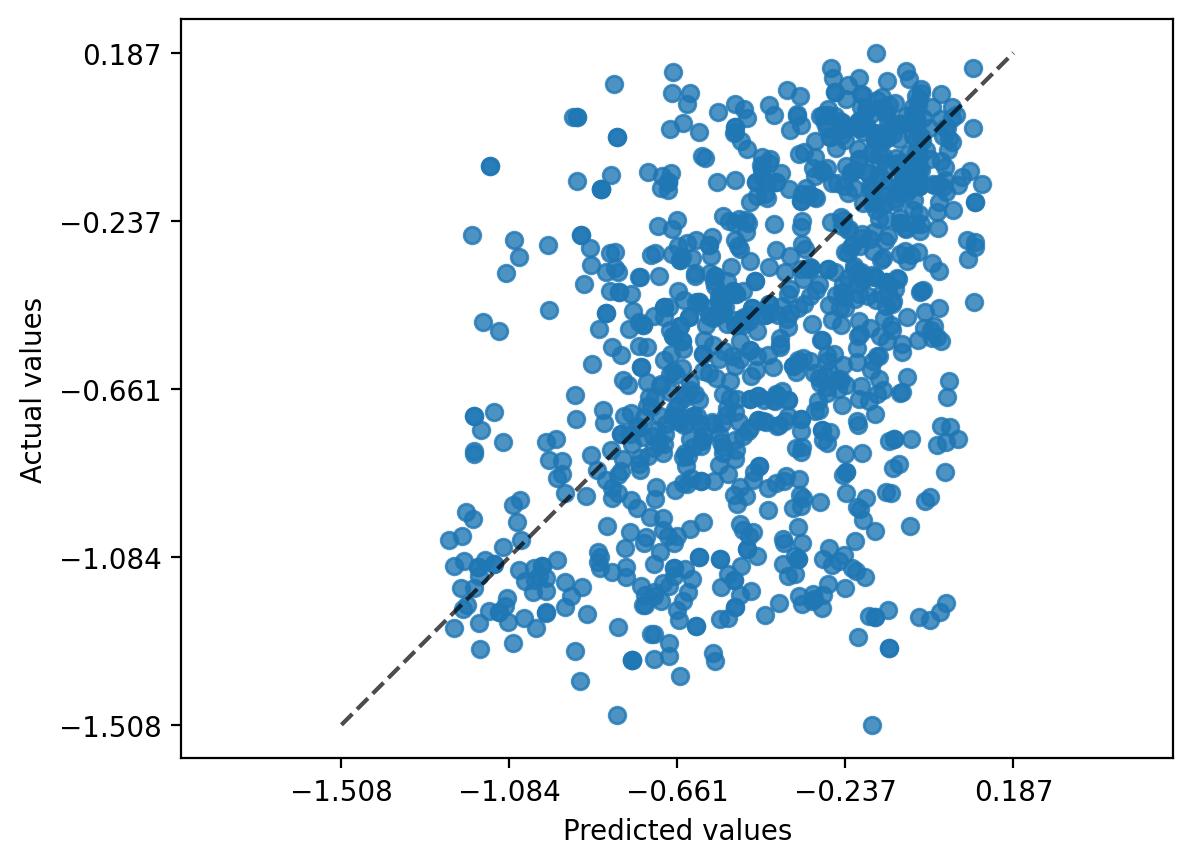

In [90]:
#Testing - don't do this until you're happy with your validation results!
#You shouldn't try to maximize your performance on test set!

# # Test model
# y_test_pred = model.predict(X_test)

# print(f'Test RMSE: {metrics.root_mean_squared_error(y_test, y_test_pred):.4f}')
# print(f'Test R2: {metrics.r2_score(y_test, y_test_pred):.4f}')

# metrics.PredictionErrorDisplay.from_predictions(y_test, y_test_pred, kind="actual_vs_predicted");